Este notebook servirá para calcular la masa del solitón para unos parámetros dados y obtener un cierto conjunto de gráficas (principalmente las densidades de energía). Además, luego sacaremos lo análogo para los momentos de inercia.

Para ver en más detalle cómo funciona, ir al notebook de Buscaminimos.

In [621]:
#Importamos las librerias.
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import scipy.integrate as integrate

#Proporciones y tamaños en las graficas.
params = {'xtick.labelsize': 30, 'ytick.labelsize': 20, 'font.size': 30}#
mpl.rcParams.update(params)

#Constantes para el calculo (en MeV o adimensionales). 1 Para el rho y 2 para el 6
F_pi_val1 = 128.576 # o 104.8 o 186
e_val1 = 6.271 # o 4.84
m_pi = 138
m_rho = 796
alpha = 0.0444
kapp_inv1 = 0.0297

F_pi_val2 = 128.48 # o 104.8 o 186
e_val2 = 6.275 # o 4.84
kapp_inv2 = 0.0297

#Valores correctos
M_N_corr = 939 #MeV
M_D_corr = 1232 #MeV
r_bar_corr = 0.72 #fm

#Factores de conversion de longitud y energia.
Factor_l1 = (2/(e_val1 *F_pi_val1))
Factor_e1 = F_pi_val1/(4*e_val1)* (12*np.pi**2)

Factor_l2 = (2/(e_val2 *F_pi_val2))
Factor_e2 = F_pi_val2/(4*e_val2)* (12*np.pi**2)

convers = 806554.815355*10**6 * (2*np.pi) #1MeV = ... m^-1

n_r = 500 #500
r_f = 30. #30
n_lam = 100 #100
lam_f1 = np.sqrt(3.84) + 0.5
lam_f2 = np.sqrt(3.8) + 0.5

rs = np.linspace(1e-6, r_f, n_r)* (2/(108 *4.648))#Porque las escalas de longitud son independientes de los parámetros.
rs2 = np.linspace(1e-6, r_f, 2000)* (2/(108 *4.648))


lams1 = np.linspace((lam_f1-0.5*2), lam_f1, n_lam)**2* Factor_l1**2
lams2 = np.linspace((lam_f2-0.5*2), lam_f2, n_lam)**2* Factor_l2**2
lams31 = np.linspace((lam_f1-0.5*2), lam_f1, 4)**2* Factor_l1**2
lams32 = np.linspace((lam_f2-0.5*2), lam_f2, 4)**2* Factor_l2**2

In [622]:
@njit
def Mskyrme(F_pi_val, lam, m_pi, e_val):
    return 6.336630541*F_pi_val**2*np.sqrt(lam) + 53.4570253/(e_val**2*np.sqrt(lam))

1.2432145817667408
1.2432012801630026


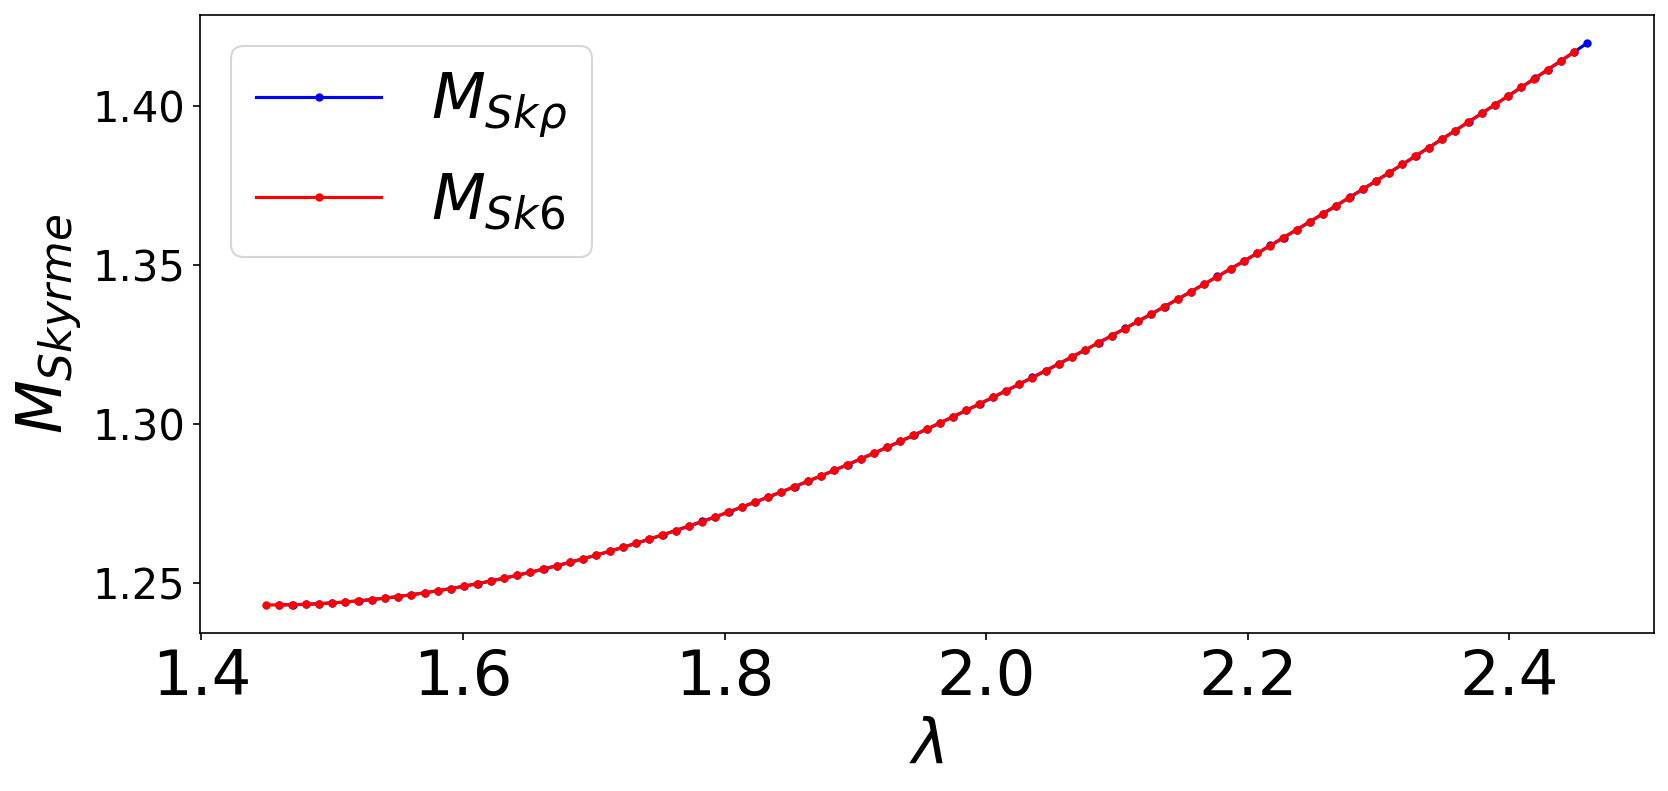

In [623]:
Masas_skyrme1 = np.array([Mskyrme(F_pi_val1, _lam, m_pi, e_val1) for _lam in lams1])/Factor_e1
print(min(Masas_skyrme1))
Masas_skyrme2 = np.array([Mskyrme(F_pi_val2, _lam, m_pi, e_val2) for _lam in lams2])/Factor_e2
print(min(Masas_skyrme2))

plt.figure('MasasSkyrme1', figsize=(12, 6), dpi=150)
plt.plot(np.sqrt(lams1)/ Factor_l1, Masas_skyrme1, '.-b', label=r'$M_{Sk\rho}$')
plt.plot(np.sqrt(lams2)/ Factor_l2, Masas_skyrme2, '.-r', label=r'$M_{Sk 6}$')

plt.xlabel(r'$\lambda$'); plt.ylabel(r'$M_{Skyrme}$')
plt.legend(loc='upper left')
plt.tight_layout(); plt.show()

Densidad radial de energía.

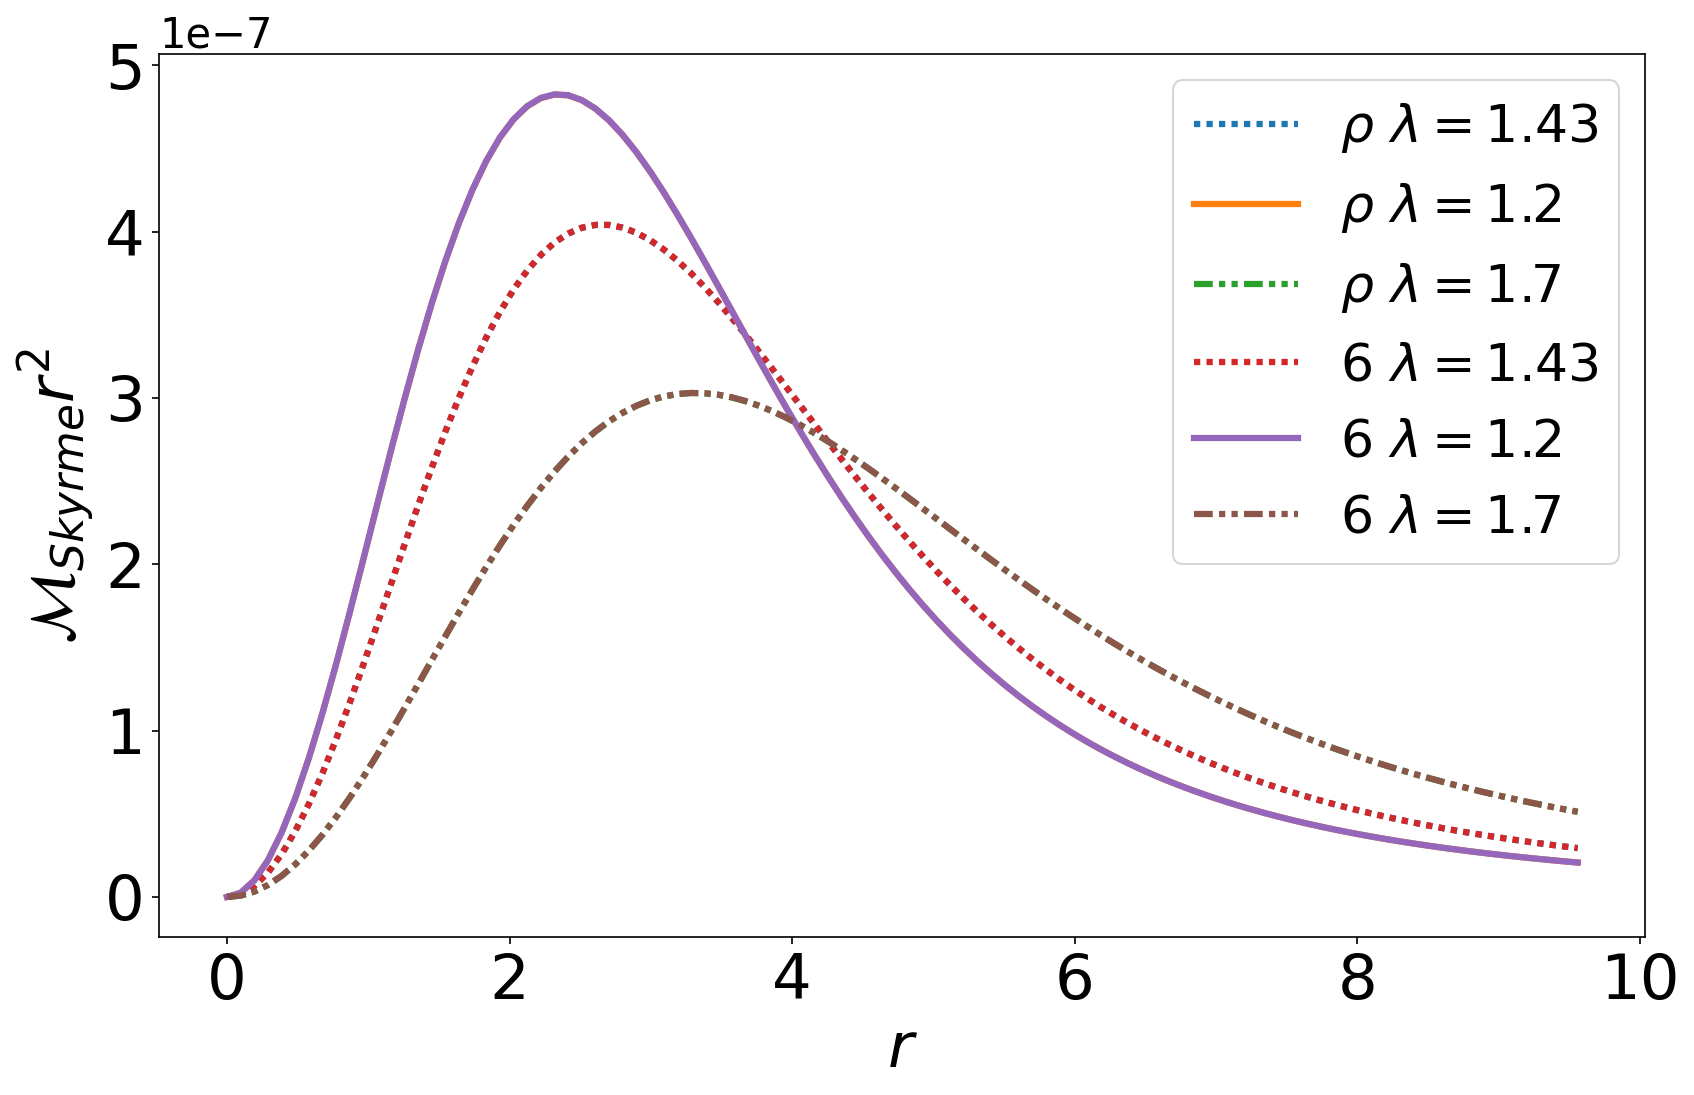

In [624]:
@njit
def Mskyrmr(r, F_pi_val, lam, m_pi, e_val):
    a = (lam+r*r); sinus = np.sin(np.pi * r / np.sqrt(a))**2
    return (F_pi_val**2 / 4 * ( np.pi**2 * lam**2 / 2*a**3 + sinus/r**2) + ( np.pi**2 * lam**2 * sinus/a**3 + sinus**2 /(2*r*r) ) / (e_val*r)**2)*r**2

Masas_skyrmer11 = np.array([Mskyrmr(_r, F_pi_val1, 2.5*Factor_l1**2, m_pi, e_val1) for _r in rs2])/Factor_e1 * Factor_l1**3
Masas_skyrmer21 = np.array([Mskyrmr(_r, F_pi_val1, 2.*Factor_l1**2, m_pi, e_val1) for _r in rs2])/Factor_e1 * Factor_l1**3
Masas_skyrmer31 = np.array([Mskyrmr(_r, F_pi_val1, 3.7*Factor_l1**2, m_pi, e_val1) for _r in rs2])/Factor_e1 * Factor_l1**3
Masas_skyrmer12 = np.array([Mskyrmr(_r, F_pi_val2, 2.5*Factor_l2**2, m_pi, e_val2) for _r in rs2])/Factor_e2 * Factor_l2**3
Masas_skyrmer22 = np.array([Mskyrmr(_r, F_pi_val2, 2*Factor_l2**2, m_pi, e_val2) for _r in rs2])/Factor_e2 * Factor_l2**3
Masas_skyrmer32 = np.array([Mskyrmr(_r, F_pi_val2, 3.7*Factor_l2**2, m_pi, e_val2) for _r in rs2])/Factor_e2 * Factor_l2**3


plt.figure('MasasSkyrme', figsize=(12, 8), dpi=150)
plt.plot(rs[:int(len(rs2)/20)] / Factor_l1, Masas_skyrmer11[:int(len(rs2)/20)], linestyle = (0, (1, 1)), label = r'$\rho\ \lambda=${}'.format(1.43), linewidth=3)
plt.plot(rs[:int(len(rs2)/20)] / Factor_l1, Masas_skyrmer21[:int(len(rs2)/20)], '-', label = r'$\rho\ \lambda=${}'.format(1.2), linewidth=3)
plt.plot(rs[:int(len(rs2)/20)] / Factor_l1, Masas_skyrmer31[:int(len(rs2)/20)], '-', linestyle = (0, (3, 1, 1, 1, 1, 1)), label = r'$\rho\ \lambda=${}'.format(1.7), linewidth=3)
plt.plot(rs[:int(len(rs2)/20)] / Factor_l2, Masas_skyrmer12[:int(len(rs2)/20)], linestyle = (0, (1, 1)), label = r'$6\ \lambda=${}'.format(1.43), linewidth=3)
plt.plot(rs[:int(len(rs2)/20)] / Factor_l2, Masas_skyrmer22[:int(len(rs2)/20)], '-', label = r'$6\ \lambda=${}'.format(1.2), linewidth=3)
plt.plot(rs[:int(len(rs2)/20)] / Factor_l2, Masas_skyrmer32[:int(len(rs2)/20)], '-', linestyle = (0, (3, 1, 1, 1, 1, 1)), label = r'$6\ \lambda=${}'.format(1.7), linewidth=3)

plt.xlabel(r'$r$'); plt.ylabel(r'$\mathcal{M}_{Skyrme} r^2$')
plt.yticks(fontsize=30)
plt.legend(loc= 'upper right', fontsize=25)
plt.tight_layout(); plt.show()

In [625]:
@njit
def eta(h, r, lam): return h/(h**2+r**2+lam)
@njit
def zeta(h, r, lam): return -r/(h**2+r**2+lam)
@njit
def pm(h): return 0.5 + 0.5*math.erf( h / np.sqrt(2.) )
@njit
def p0(h): return np.exp(-0.5*h*h) / np.sqrt(np.sqrt(np.pi))
@njit
def f(r, lam): return - np.pi / np.sqrt( 1. + lam / (r*r) )
@njit
def F(h, r, lam): return  - 0.5 * r * ( np.pi + 2.*math.atan( h / np.sqrt(r**2+lam) ) )/ (np.sqrt(r**2+lam))
@njit
def k1(h, r, lam): return ( eta(h, r, lam)*np.cos(2*F(h, r, lam)) - (zeta(h, r, lam)+0.5/r)*np.sin(2*F(h, r, lam)) + 0.5*np.sin(2*f(r, lam))*pm(h)/r ) * p0(h)
@njit
def Fdiff(h, r, lam): return  F(h, r, lam) *( 1./r - r/(lam+r*r)) + eta(h, r, lam)*r*r/(lam+r*r)
@njit
def k2(h, r, lam): return ( eta(h, r, lam) -  Fdiff(h, r, lam)   + f(r, lam) * (1 - (f(r, lam) /np.pi )**2 ) / r  * pm(h) )*p0(h)
@njit
def k3(h, r, lam): return ( eta(h, r, lam)*np.sin(2*F(h, r, lam)) + \
            (zeta(h, r, lam)+0.5/r)*np.cos(2*F(h, r, lam)) -\
            0.5/r - 0.5*( np.cos(2*f(r, lam)) - 1 )*pm(h)/r ) *p0(h)
@njit
def ki(h, r, lam):
    etav = eta(h, r, lam); zetav = zeta(h, r, lam); Fdiffv = Fdiff(h, r, lam); Fv = 2*F(h, r, lam); fv = f(r, lam)
    pmv = pm(h); p0v = p0(h)

    k1val = ( etav*np.cos(Fv) - (zetav+0.5/r)*np.sin(Fv) + 0.5*np.sin(2*fv)*pmv/r ) * p0v
    k2val = ( etav -  Fdiffv   + fv * (1 - (fv /np.pi )**2 ) / r  * pmv )*p0v
    k3val =  ( etav*np.sin(Fv) +  (zetav+0.5/r)*np.cos(Fv) - 0.5/r - 0.5*( np.cos(2*fv) - 1 )*pmv/r ) *p0v
    return k1val, k2val, k3val

In [626]:
k1_r_lam = np.array([ [ integrate.quad(lambda h: k1(h, r=_r, lam=_l), -np.inf, np.inf)[0] for _r in rs ] for _l in lams1 ])
k2_r_lam = np.array([ [ integrate.quad(lambda h: k2(h, r=_r, lam=_l), -np.inf, np.inf)[0] for _r in rs ] for _l in lams1 ])
k3_r_lam = np.array([ [ integrate.quad(lambda h: k3(h, r=_r, lam=_l), -np.inf, np.inf)[0] for _r in rs ] for _l in lams1 ])

k1_r_lam2 = np.array([ [ integrate.quad(lambda h: k1(h, r=_r, lam=_l), -np.inf, np.inf)[0] for _r in rs2 ] for _l in lams31 ])
k2_r_lam2 = np.array([ [ integrate.quad(lambda h: k2(h, r=_r, lam=_l), -np.inf, np.inf)[0] for _r in rs2 ] for _l in lams31 ])
k3_r_lam2 = np.array([ [ integrate.quad(lambda h: k3(h, r=_r, lam=_l), -np.inf, np.inf)[0] for _r in rs2 ] for _l in lams31 ])

Densidad radial de $k_i$

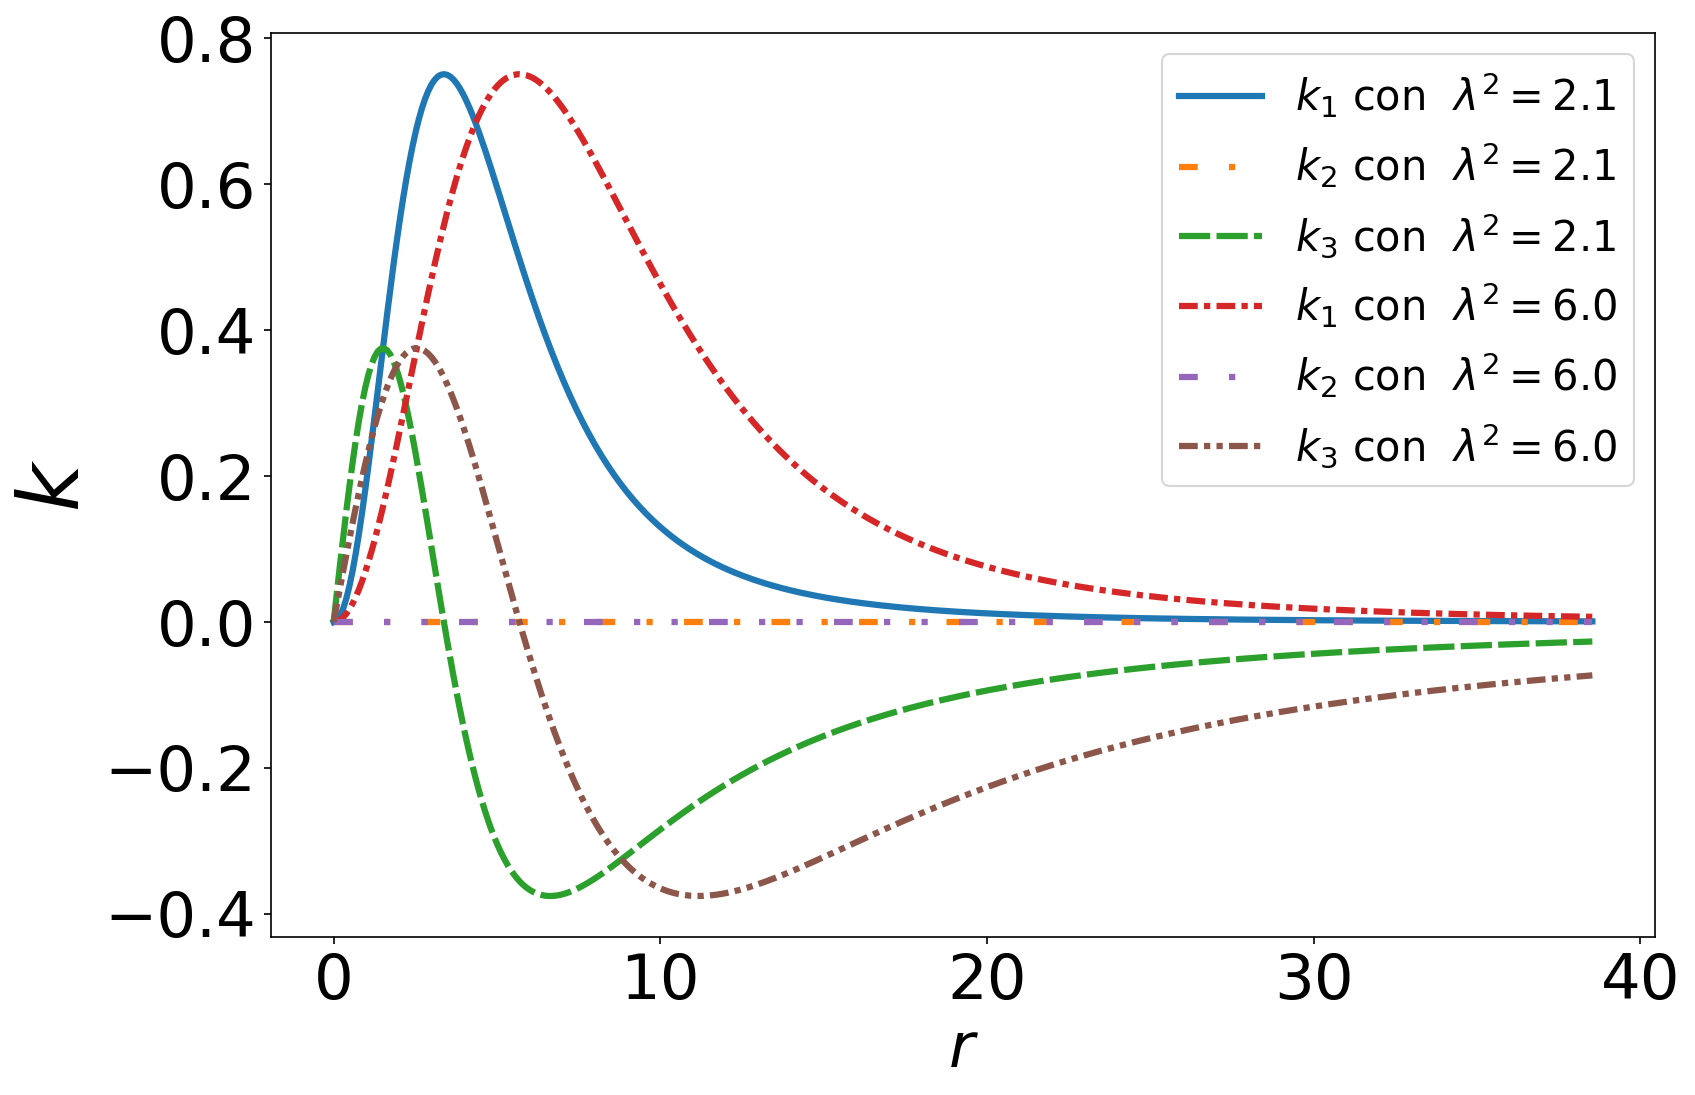

In [627]:
plt.figure('ki frente a r', figsize=(12, 8), dpi = 150)
plt.plot(rs[:int(len(rs2)/5)] / Factor_l1, k1_r_lam2[0][:int(len(rs2)/5)], '-', label=r'$k_1$ con  $\lambda^2=${}'.format(round(lams31[0]/Factor_l1**2, 1)), linewidth=3)
plt.plot(rs[:int(len(rs2)/5)] / Factor_l1, k2_r_lam2[0][:int(len(rs2)/5)], linestyle=(0, (3, 5, 1, 5)), label=r'$k_2$ con  $\lambda^2=${}'.format(round(lams31[0]/Factor_l1**2, 1)), linewidth=3)
plt.plot(rs[:int(len(rs2)/5)] / Factor_l1, k3_r_lam2[0][:int(len(rs2)/5)], linestyle=(0, (5, 1)), label=r'$k_3$ con  $\lambda^2=${}'.format(round(lams31[0]/Factor_l1**2, 1)), linewidth=3)
plt.plot(rs[:int(len(rs2)/5)] / Factor_l1, k1_r_lam2[-1][:int(len(rs2)/5)], linestyle=(0, (3, 1, 1, 1)), label=r'$k_1$ con  $\lambda^2=${}'.format(round(lams31[-1]/Factor_l1**2, 1)), linewidth=3)
plt.plot(rs[:int(len(rs2)/5)] / Factor_l1, k2_r_lam2[-1][:int(len(rs2)/5)], linestyle=(0, (3, 5, 1, 5, 1, 5)), label=r'$k_2$ con  $\lambda^2=${}'.format(round(lams31[-1]/Factor_l1**2, 1)), linewidth=3)
plt.plot(rs[:int(len(rs2)/5)] / Factor_l1, k3_r_lam2[-1][:int(len(rs2)/5)], linestyle=(0, (3, 1, 1, 1, 1, 1)), label=r'$k_3$ con  $\lambda^2=${}'.format(round(lams31[-1]/Factor_l1**2, 1)), linewidth=3)
plt.xlabel(r'$r$'); plt.ylabel(r'$k$', fontsize=40)
plt.legend(loc='upper right', fontsize = 20)
plt.yticks(fontsize=30)
plt.tight_layout()
plt.show()

In [628]:
@njit
def M4_dif(k11, k12, k31, k32, dr, r):
    dk1 = (k12-k11)/dr; dk3 = (k32-k31)/dr; k1r = (k12+k11)/2; k3r = (k32+k31)/2#Definimos tanto las derivadas (dk1, dk3) como los valores medios entre los dos puntos(k1r, k3r)
    return (k1r + r*dk1)**2 + 3*k3r**2 + 2*r*k3r*dk3 + dk3**2 * r**2
@njit
def M5_dif(k1, k3, r): return (k1**2 + k3**2)*r**2
@njit
def M6_dif(k31, k32, dr, r, lam):
    dk3 = (k32-k31)/dr; k3r = (k32+k31)/2; a = np.sqrt(lam+r**2)
    return np.sin(np.pi*r/a) / (r*a**3) * ( 2*np.pi*lam*r*(k3r+r*dk3)  + k3r*a**3*np.sin(2*np.pi*r/a) )
@njit
def integrador4(k1, k3, rs):
    dr = rs[1] - rs[0]; M4 = 0
    for i in range(len(rs)-1): M4 += M4_dif(k1[i], k1[i+1], k3[i], k3[i+1], dr, (rs[i]+rs[i+1])/2 ) * dr#Vamos a cada punto y evaluamos el integrando
    return M4*4.*np.pi
@njit
def integrador5(k1, k3, rs):
    dr = rs[2] - rs[1]; M5 = 0
    for i in range(len(rs)): M5 += M5_dif(k1[i], k3[i], rs[i]) * dr#Vamos a cada punto y evaluamos el integrando
    return M5*4.*np.pi
@njit
def integrador6(k3, rs, lam):
    dr = rs[2] - rs[1]; M6 = 0
    for i in range(len(rs)-1): M6 += M6_dif( k3[i], k3[i+1], dr, (rs[i]+rs[i+1])/2, lam ) * dr#Vamos a cada punto y evaluamos el integrando
    return M6*16.*np.pi
@njit
def M7(F_pi_val, lam, kapp_inv): return 4*np.pi**3 * 1.35209 * kapp_inv**2/ (np.sqrt(lam)**3 *F_pi_val**2)

@njit
def dens_M7(F_pi_val, lam, kapp_inv, r): return 4*np.pi**3*kapp_inv**2 *lam/(F_pi_val**2) * np.sin(np.pi*r/np.sqrt(lam+r*r))**4 / (r*r*(r*r+lam)**3)

Densidad radial de energía.

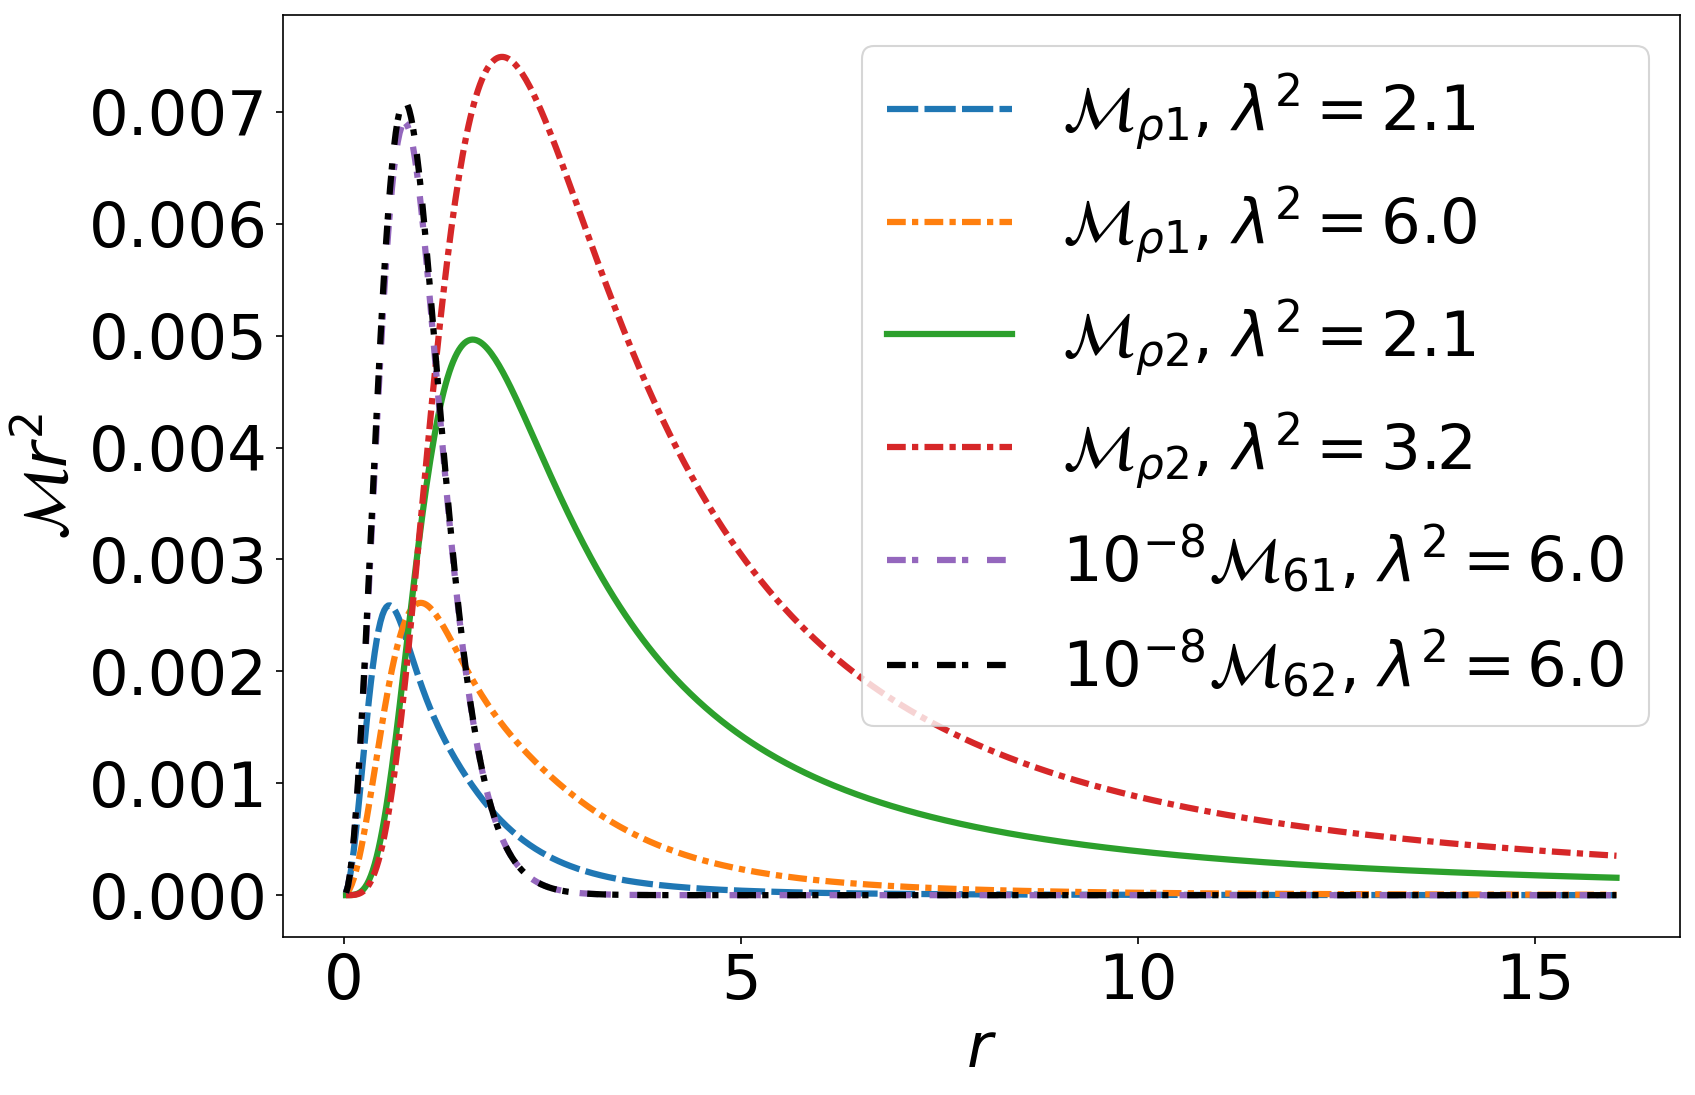

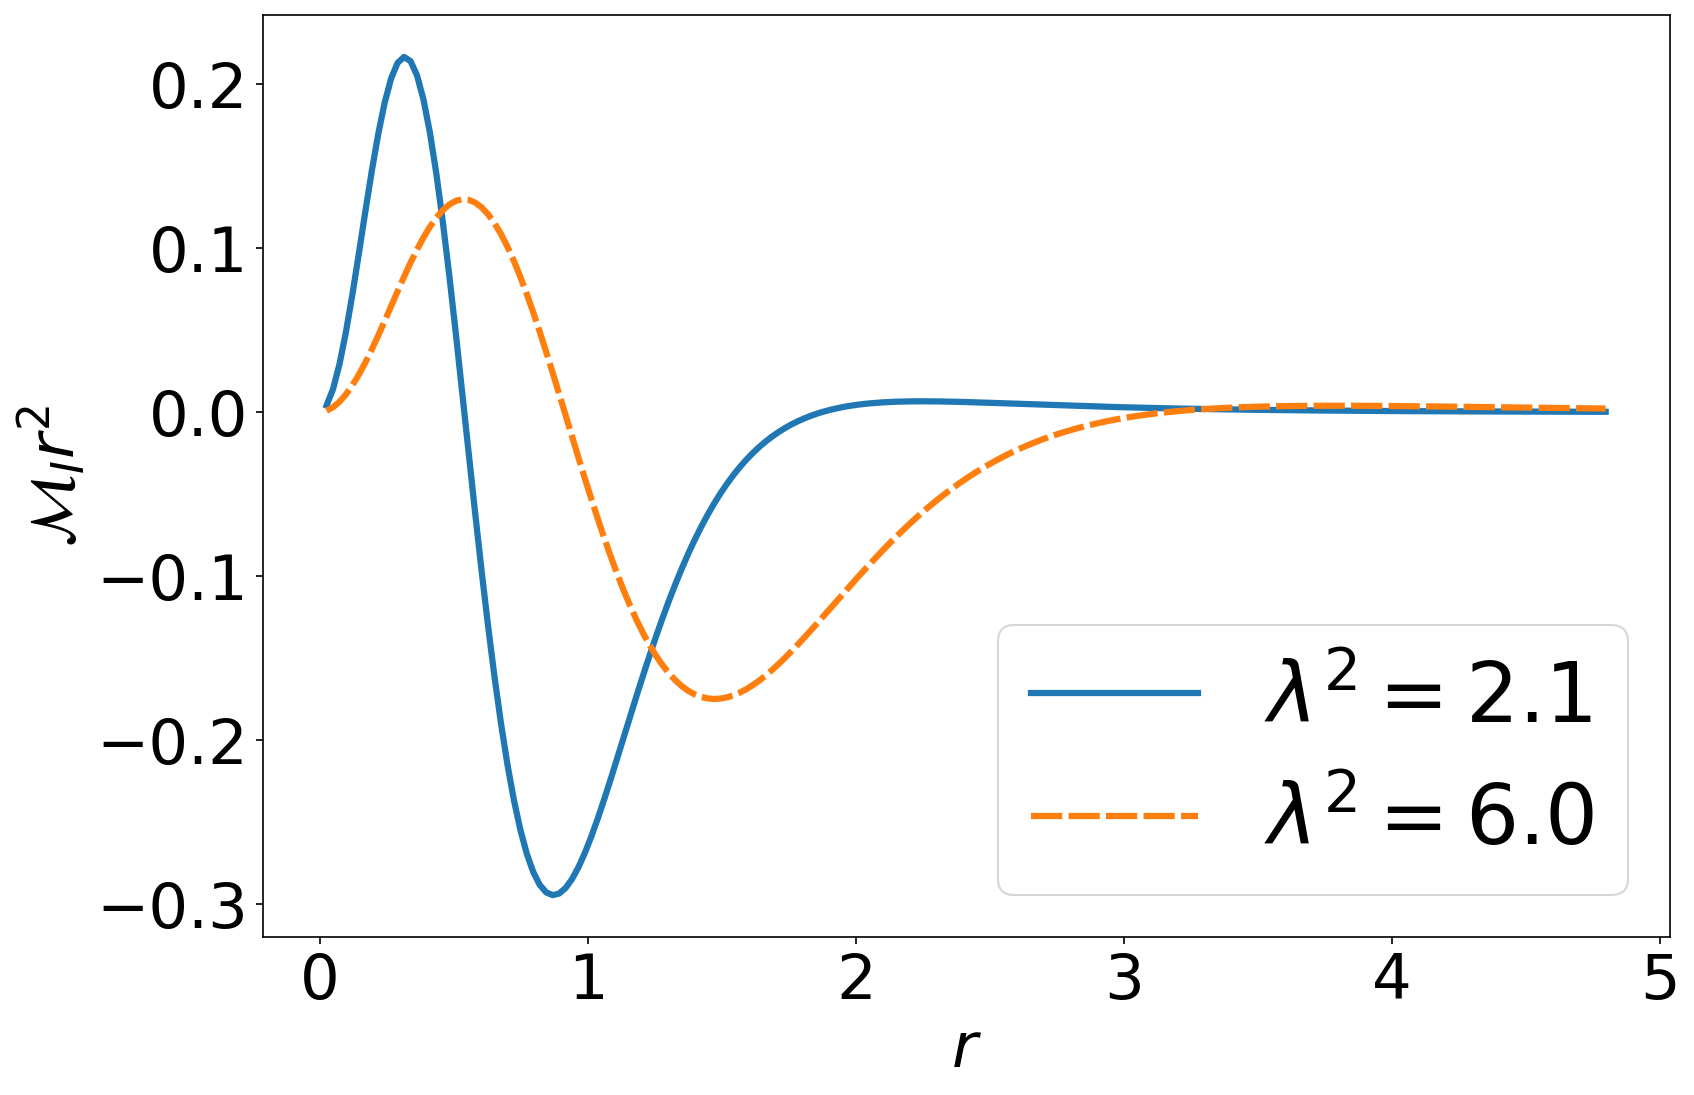

In [629]:
dr2 = rs2[1] - rs2[0]
M_r4 = np.array([ M4_dif(k1_r_lam2[0][_r], k1_r_lam2[0][_r+1], k3_r_lam2[0][_r], k3_r_lam2[0][_r+1], dr2, rs2[_r]) for _r in range(len(rs2)-1) ])/Factor_e1
M_r42 = np.array([ M4_dif(k1_r_lam2[-1][_r], k1_r_lam2[-1][_r+1], k3_r_lam2[-1][_r], k3_r_lam2[-1][_r+1], dr2, rs2[_r]) for _r in range(len(rs2)-1) ])/Factor_e1
M_r5 = m_rho**2*np.array([ M5_dif(k1_r_lam2[0][_r], k3_r_lam2[0][_r], rs2[_r]) for _r in range(len(rs2)-1) ])/Factor_e1
M_r52 = m_rho**2*np.array([ M5_dif(k1_r_lam2[int(len(lams31)/4)][_r],  k3_r_lam2[int(len(lams31)/4)][_r], rs2[_r]) for _r in range(len(rs2)-1) ])/Factor_e1
M_r61 = alpha*4*np.array([ M6_dif(k3_r_lam2[0][_r], k3_r_lam2[0][_r+1], dr2, rs2[_r], lams31[0]) for _r in range(len(rs2)-1) ])/Factor_e1
M_r62 = alpha*4*np.array([ M6_dif(k3_r_lam2[-1][_r], k3_r_lam2[-1][_r+1], dr2, rs2[_r], lams31[-1]) for _r in range(len(rs2)-1) ])/Factor_e1
M_7_dif1 = np.array([ dens_M7(F_pi_val1, lams31[-1], kapp_inv1, rs2[_r]) for _r in range(len(rs2)-1) ])/Factor_e1
M_7_dif2 = np.array([ dens_M7(F_pi_val2, lams32[-1], kapp_inv2, rs2[_r]) for _r in range(len(rs2)-1) ])/Factor_e2

labels2 = [ ', $\lambda^2=${0}'.format(round(lams31[0]/Factor_l1**2, 1)), ', $\lambda^2=${0}'.format(round(lams31[-1]/Factor_l1**2, 1))]
labels3 = [ ', $\lambda^2=${0}'.format(round(lams31[0]/Factor_l1**2, 1)), ', $\lambda^2=${0}'.format(round(lams31[int(len(lams31)/4)]/Factor_l1**2, 1))]
plt.figure('Mi frente a r', figsize=(12, 8), dpi = 150)
plt.plot(rs2[1:int(len(rs2)/3)] / Factor_l1, M_r4[1:int(len(rs2)/3)], linestyle=(0, (5, 1)), label=r'$\mathcal{M}_{\rho 1}$'+labels2[0], linewidth=3)
plt.plot(rs2[1:int(len(rs2)/3)] / Factor_l1, M_r42[1:int(len(rs2)/3)], linestyle=(0, (3, 1, 1, 1)), label=r'$\mathcal{M}_{\rho 1}$'+labels2[1], linewidth=3)

plt.plot(rs2[1:int(len(rs2)/3)] / Factor_l1, M_r5[1:int(len(rs2)/3)], '-',label=r'$\mathcal{M}_{\rho 2}$'+labels3[0], linewidth=3)
plt.plot(rs2[1:int(len(rs2)/3)] / Factor_l1, M_r52[1:int(len(rs2)/3)], linestyle=(0, (3, 1, 1, 1)), label=r'$\mathcal{M}_{\rho 2}$'+labels3[1], linewidth=3)

plt.plot(rs2[1:int(len(rs2)/3)] / Factor_l1, M_7_dif1[1:int(len(rs2)/3)]/10**8, linestyle=(0, (3, 1, 1, 3)), label=r'$10^{-8}\mathcal{M}_{6 1}$'+labels2[1], linewidth=3)
plt.plot(rs2[1:int(len(rs2)/3)] / Factor_l2, M_7_dif2[1:int(len(rs2)/3)]/10**8, 'black', linestyle=(0, (3, 1, 1, 3)), label=r'$10^{-8}\mathcal{M}_{6 2}$'+labels2[1], linewidth=3)
plt.xlabel(r'$r$'); plt.ylabel(r'$\mathcal{M} r^2$')
plt.yticks(fontsize=30)
plt.legend(loc='upper right', fontsize = 30)
plt.tight_layout(); plt.show()


labels2 = [ '$\lambda^2=${0}'.format(round(lams1[0]/Factor_l1**2, 1)), '$\lambda^2=${0}'.format(round(lams1[-1]/Factor_l1**2, 1))]
plt.figure('M6 frente a r', figsize=(12, 8), dpi = 150)
plt.plot(rs2[1:int(len(rs2)/10)] / Factor_l1, M_r61[1:int(len(rs2)/10)], '-', label=labels2[0], linewidth=3)
plt.plot(rs2[1:int(len(rs2)/10)] / Factor_l1, M_r62[1:int(len(rs2)/10)], linestyle=(0, (5, 1)), label=labels2[1], linewidth=3)
plt.xlabel(r'$r$'); plt.ylabel(r'$\mathcal{M}_I r^2$')
plt.yticks(fontsize=30)
plt.legend(loc='lower right', fontsize = 40)
plt.tight_layout(); plt.show()

In [630]:
M4 = np.array( [ integrador4(k1_r_lam[_], k3_r_lam[_], rs) for _ in range(n_lam) ] )/Factor_e1
M5 = m_rho**2 * np.array( [ integrador5(k1_r_lam[_], k3_r_lam[_], rs) for _ in range(n_lam) ] )/Factor_e1
M6 = alpha*np.array( [ integrador6(k3_r_lam[_], rs, lams1[_]) for _ in range(n_lam) ] )/Factor_e1

Masas_71 = np.array([M7(F_pi_val1,  _lam, kapp_inv1) for _lam in lams1]) / Factor_e1
Masas_skyrme21 = np.array([Mskyrme(F_pi_val1, _lam, m_pi, e_val1) for _lam in lams1])/Factor_e1

Masas_72 = np.array([M7(F_pi_val2,  _lam, kapp_inv2) for _lam in lams2]) / Factor_e2
Masas_skyrme22 = np.array([Mskyrme(F_pi_val2, _lam, m_pi, e_val2) for _lam in lams2])/Factor_e2

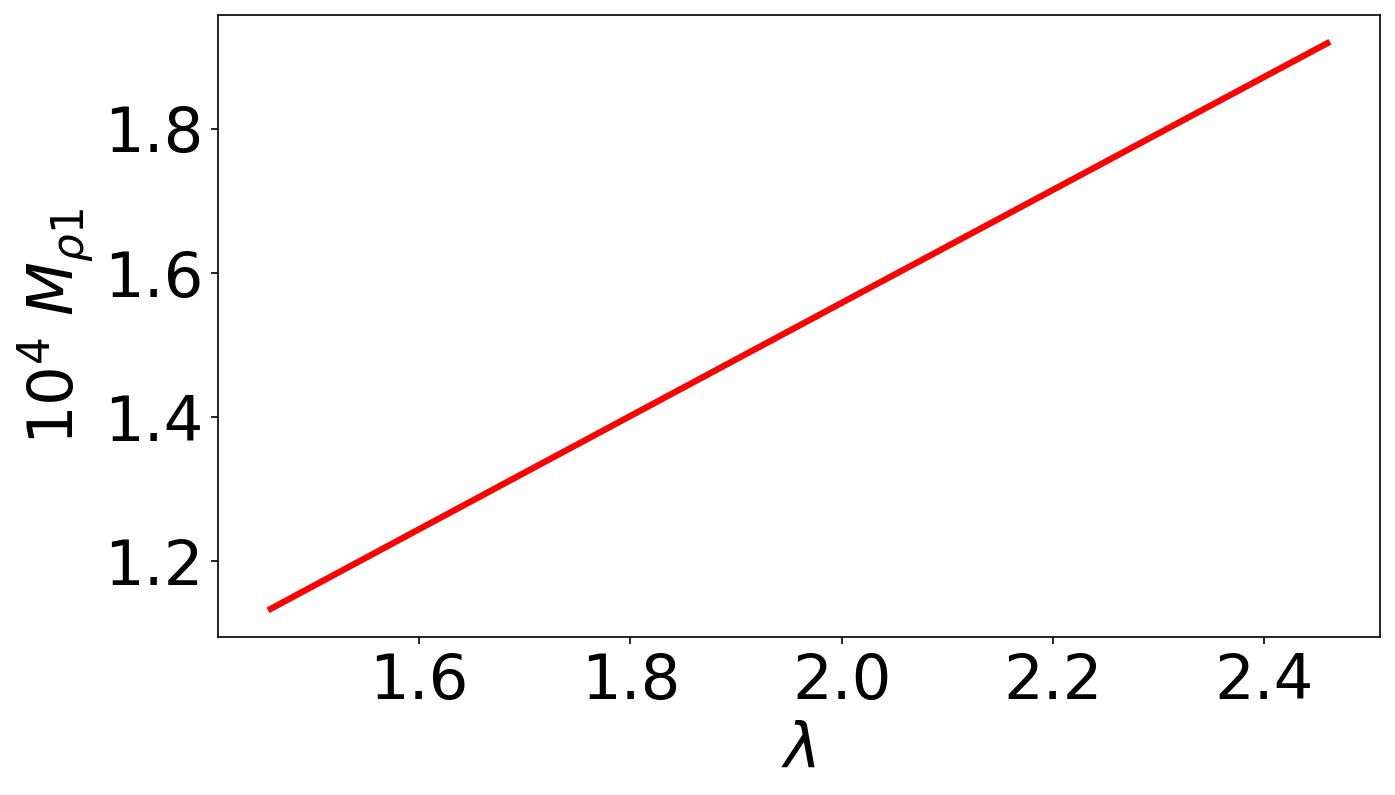

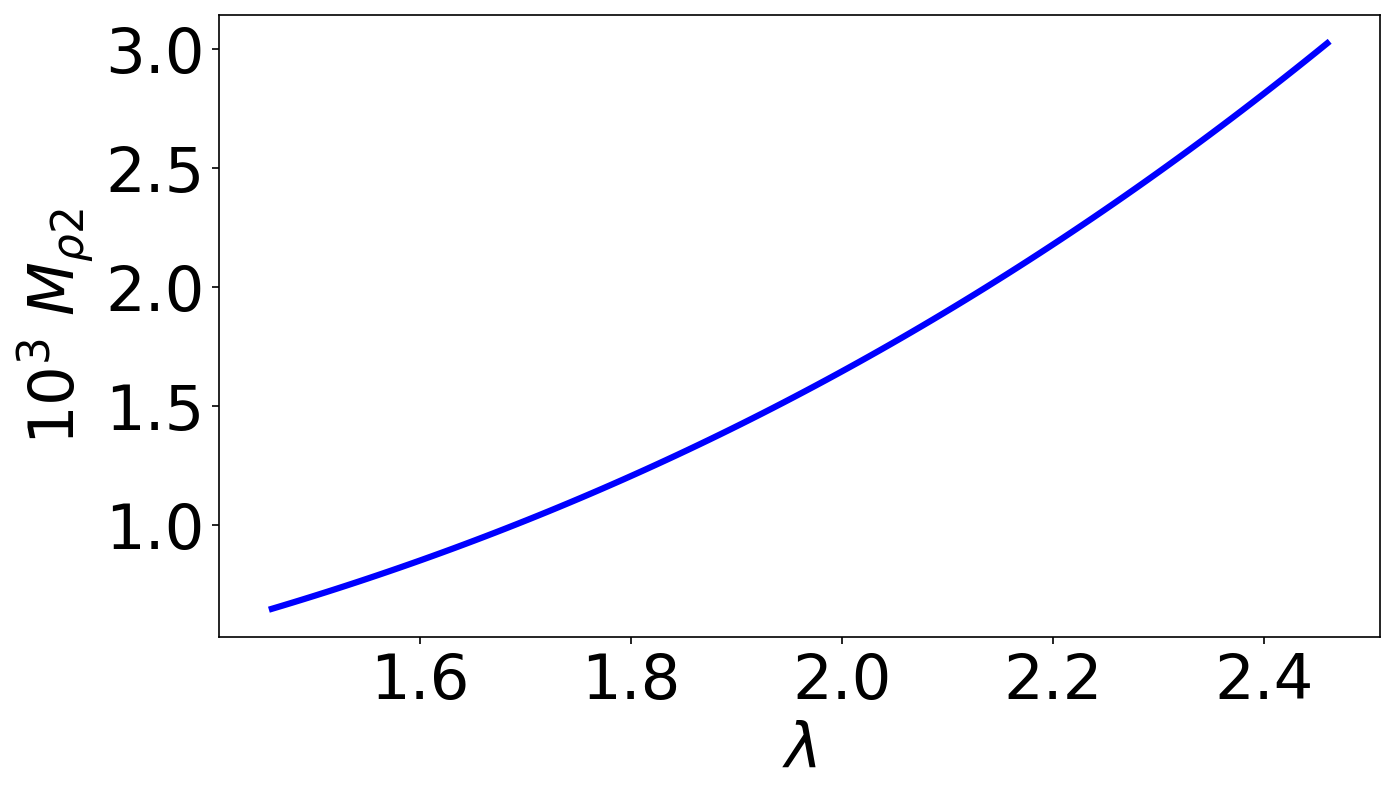

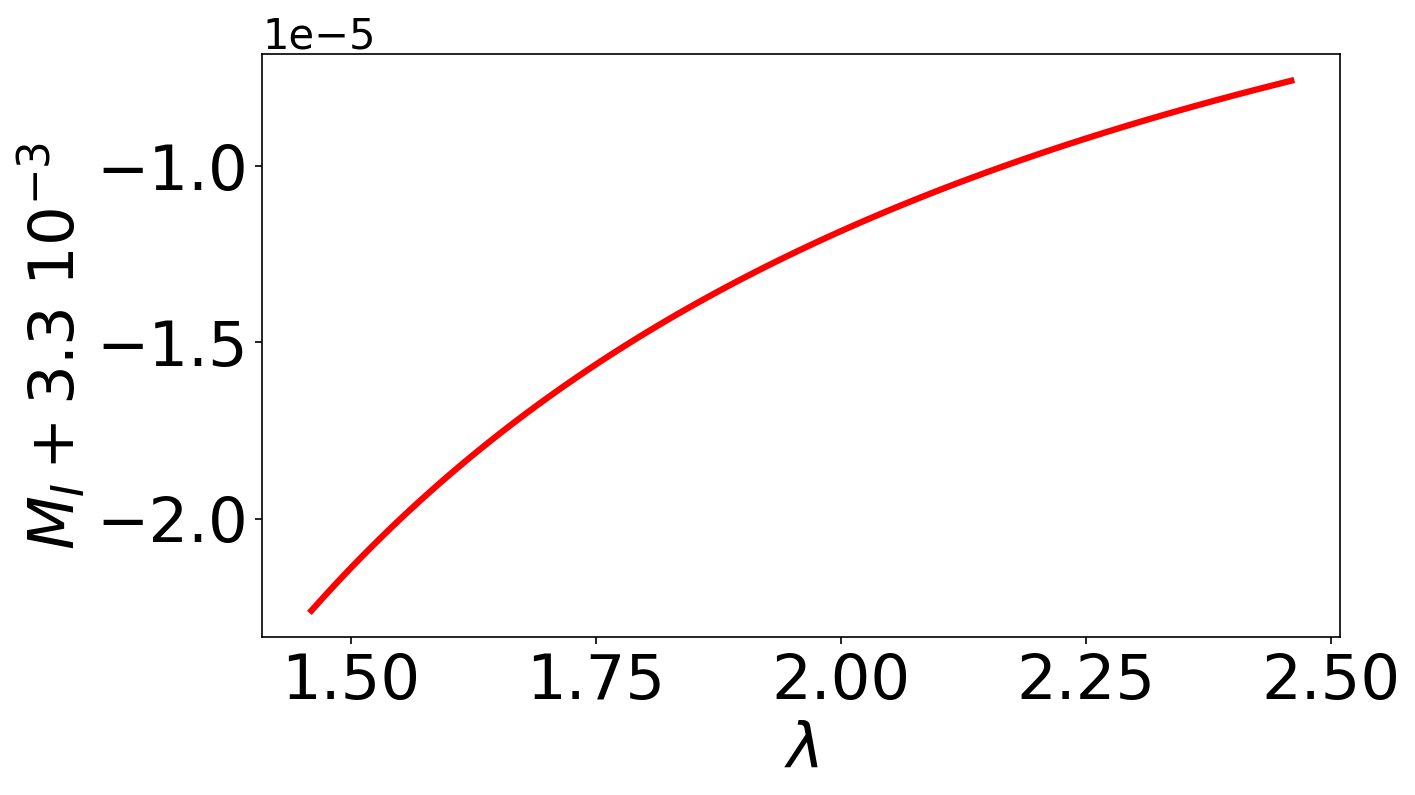

In [631]:
plt.figure('M4', figsize=(10, 6), dpi = 150)
plt.plot(np.sqrt(lams1)/ Factor_l1, M4*10000, '-r', linewidth=3)

plt.xlabel(r'$\lambda$'); plt.ylabel(r'$10^4\ M_{\rho 1}$')
plt.yticks(fontsize=30)
plt.tight_layout()

plt.figure('M5', figsize=(10, 6), dpi = 150)
plt.plot(np.sqrt(lams1)/ Factor_l1, M5*1000, '-b', linewidth=3)

plt.xlabel(r'$\lambda$'); plt.ylabel(r'$10^3\ M_{\rho 2}$')
plt.yticks(fontsize=30)
plt.tight_layout()

plt.figure('M6', figsize=(10, 6), dpi = 150)
plt.plot(np.sqrt(lams1)/ Factor_l1, M6+3.3e-3, '-r', linewidth=3)

plt.xlabel(r'$\lambda$'); plt.ylabel(r'$M_I+3.3\ 10^{-3}$')
plt.yticks(fontsize=30)
plt.tight_layout(); plt.show()

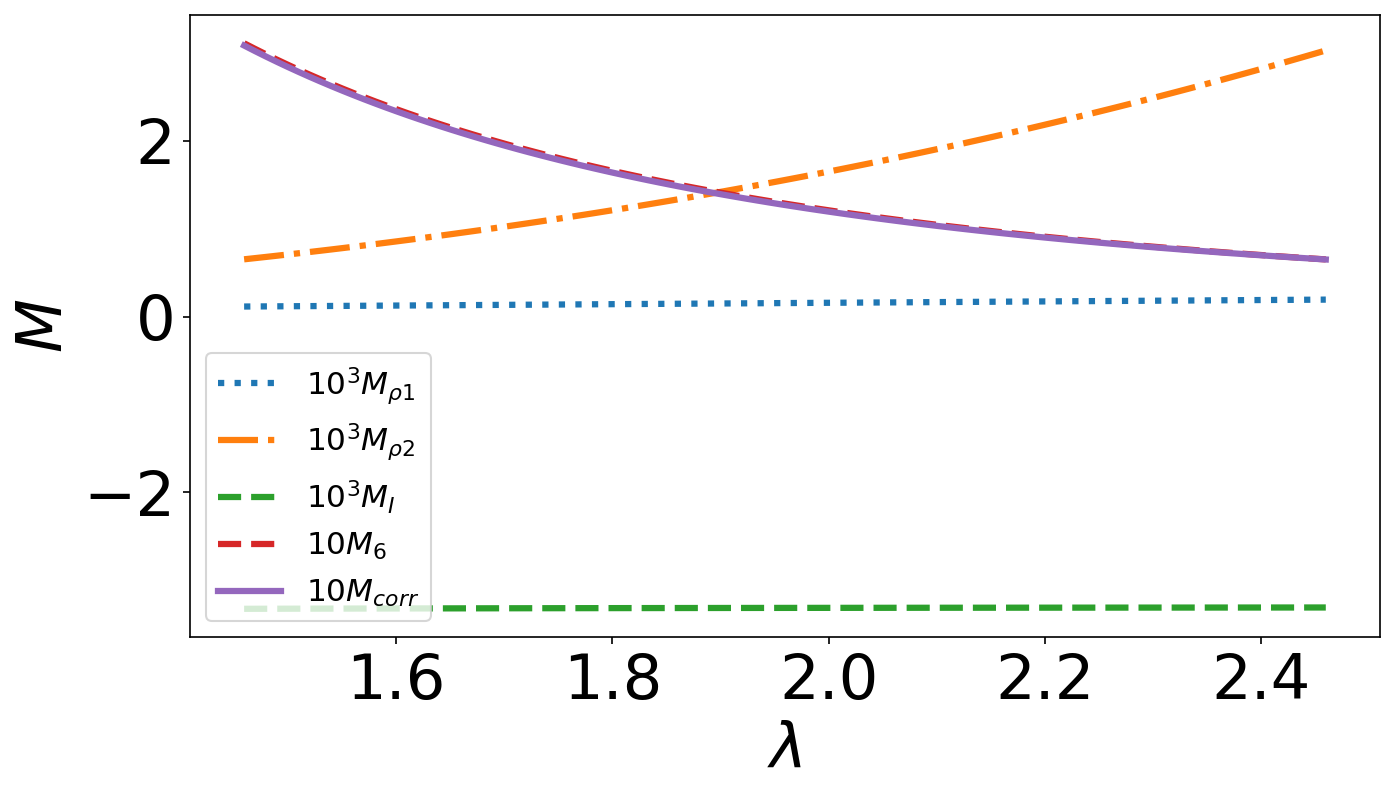

In [660]:
plt.figure('Masas', figsize=(10, 6), dpi=150)
plt.plot(np.sqrt(lams1)/ Factor_l1, M4*1000, ':', linewidth=3, label=r'$10^3 M_{\rho 1}$')
plt.plot(np.sqrt(lams1)/ Factor_l1, M5*1000, '-.', linewidth=3, label=r'$10^3 M_{\rho 2}$')
plt.plot(np.sqrt(lams1)/ Factor_l1, M6*1000, '--', linewidth=3, label=r'$10^3M_I$')
plt.plot(np.sqrt(lams1)/ Factor_l1, Masas_71*10, '--', linewidth=3, label=r'$10 M_6$')
plt.plot(np.sqrt(lams1)/ Factor_l1, (M4+M5+M6+Masas_71)*10, '-', linewidth=3, label=r'$10 M_{corr}$')

plt.xlabel(r'$\lambda$'); plt.ylabel(r'$M$')
plt.legend(loc='lower left', fontsize=15)
plt.yticks(fontsize=30)
plt.tight_layout(); plt.show()

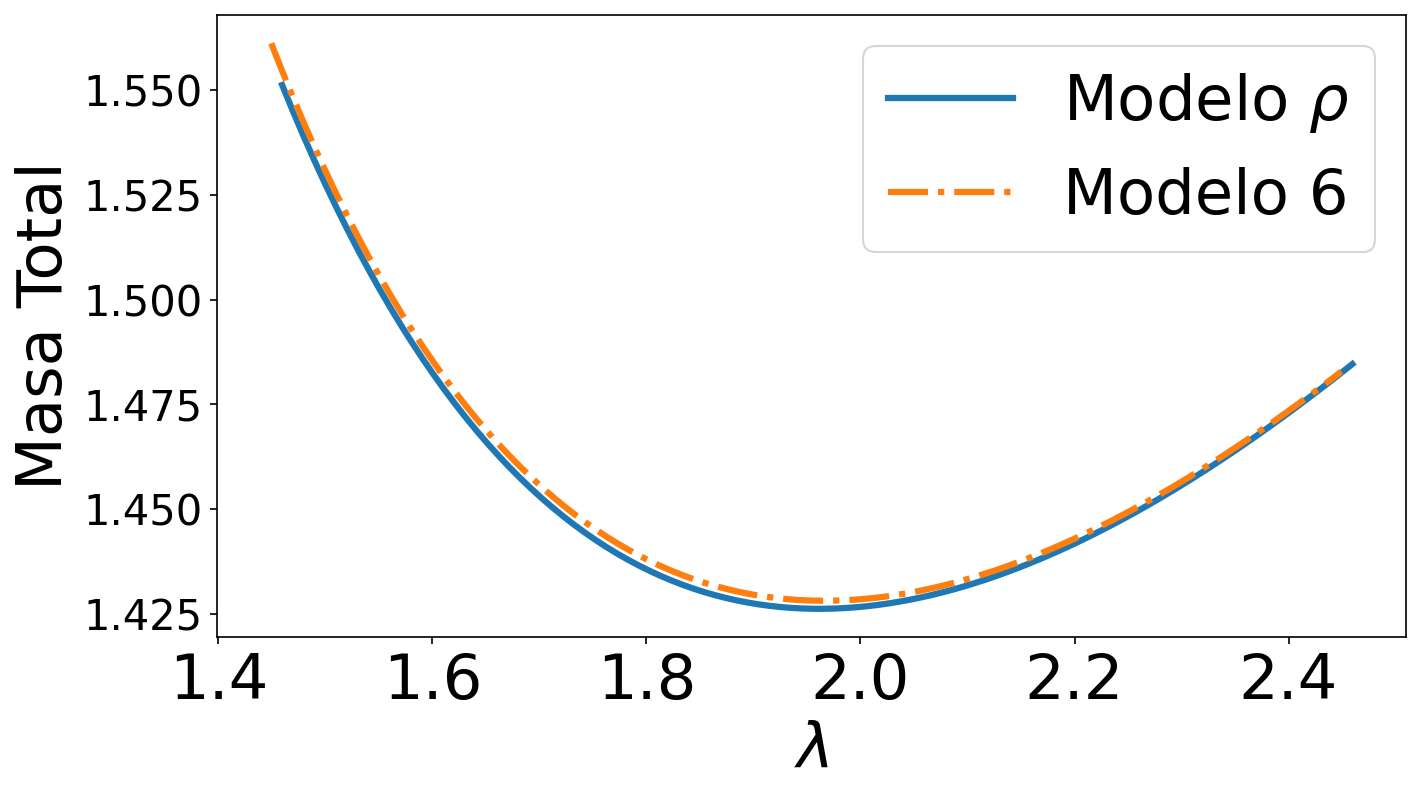

In [661]:
plt.figure('Masas', figsize=(10, 6), dpi=150)
plt.plot(np.sqrt(lams1)/ Factor_l1, Masas_skyrme1+M4+M5+M6+Masas_71, '-', linewidth=3, label=r'Modelo $\rho$')
plt.plot(np.sqrt(lams2)/ Factor_l2, Masas_skyrme2+Masas_72, '-.', linewidth=3, label=r'Modelo 6')

plt.xlabel(r'$\lambda$'); plt.ylabel('Masa Total')
plt.legend(loc='upper right')
plt.tight_layout(); plt.show()

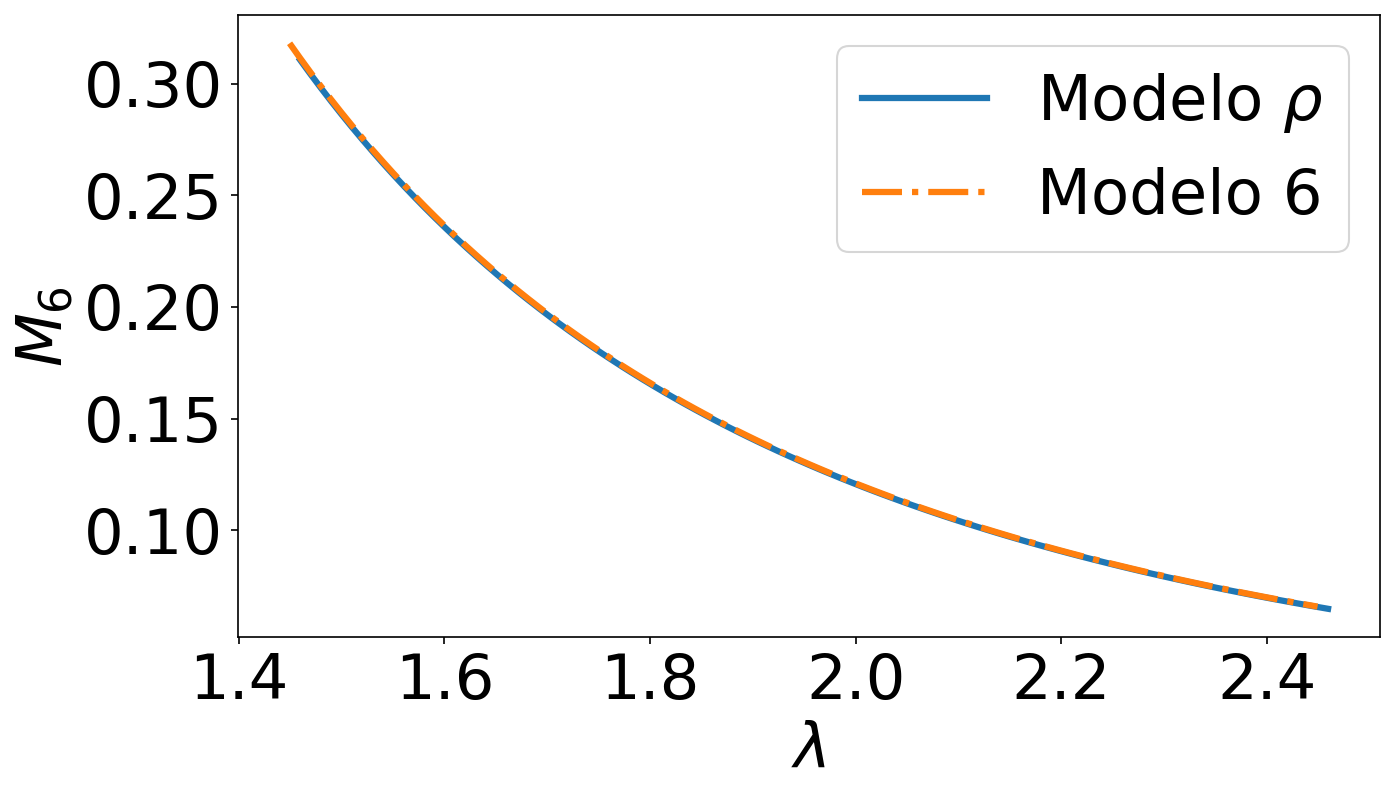

In [662]:
plt.figure('M7', figsize=(10, 6), dpi=150)
plt.plot(np.sqrt(lams1)/ Factor_l1, Masas_71, '-', linewidth=3, label=r'Modelo $\rho$')
plt.plot(np.sqrt(lams2)/ Factor_l2, Masas_72, '-.', linewidth=3, label=r'Modelo 6')

plt.xlabel(r'$\lambda$'); plt.ylabel('$M_6$')
plt.legend(loc='upper right')
plt.yticks(fontsize=30)
plt.tight_layout(); plt.show()

In [663]:
Mtotal = Masas_skyrme1+M4+M5+M6+Masas_71
MSkyrm6 = Masas_skyrme2+Masas_72

print('Minimo Rho=', min(Mtotal))
print('Minimo Skyrme6=', min(MSkyrm6))

print('lam minimo Rho=', np.sqrt(lams1[list(Mtotal).index(min(Mtotal))]) / Factor_l1)
print('lam minimo Skyrme6=', np.sqrt(lams2[list(MSkyrm6).index(min(MSkyrm6))]) / Factor_l2)

Minimo Rho= 1.4261549412717984
Minimo Skyrme6= 1.428076257893024
lam minimo Rho= 1.9646422992770476
lam minimo Skyrme6= 1.9645103841133078


Ahora los momentos de inercia.

In [636]:
@njit
def I12(F_pi_val, e_val, lam): return np.pi*np.sqrt(lam)/(e_val**2)*(9.982 + 516.357*F_pi_val**2*e_val**2*lam)
@njit
def I4(k1, k3, rs): return integrador5(k1, k3, rs)*(4./3.)
@njit
def MI6_dif(k3, dr, r, lam):
    a = np.sqrt(lam+r**2)
    return r*r*np.sin(np.pi*r/a)*k3*( np.sin(2.*np.pi*r/a)/r + 2.*np.pi*lam/a**3)
@njit
def integradorI6(k3, rs, lam):
    dr = rs[2] - rs[1]; M6 = 0
    for i in range(len(rs)): M6 += MI6_dif( k3[i], dr, rs[i], lam ) * dr
    return M6
@njit
def I6(alpha, k1, k3, lam, rs):
    return 32*np.pi/3 * alpha * integradorI6(k3, rs, lam)
@njit
def I7(F_pi_val, kappa_inv, lam): return 1.26611*np.pi**3 *kappa_inv**2/(np.sqrt(lam)*F_pi_val**2) 

In [637]:
I__121 = np.array( [ I12(F_pi_val1, e_val1, lams1[_]) for _ in range(n_lam) ] )
I__122 = np.array( [ I12(F_pi_val2, e_val2, lams2[_]) for _ in range(n_lam) ] )
I__4 = np.array( [ I4(k1_r_lam[_], k3_r_lam[_], rs) for _ in range(n_lam) ] )
I__6 = np.array( [ integradorI6(k3_r_lam[_], rs, lams1[_]) for _ in range(n_lam) ] )
I__71 = np.array( [ I7(F_pi_val1, kapp_inv1, lams1[_]) for _ in range(n_lam) ] )
I__72 = np.array( [ I7(F_pi_val2, kapp_inv2, lams2[_]) for _ in range(n_lam) ] )

I__T1 = I__121 + I__4 + I__6 + I__71
I__T2 = I__122 + I__72

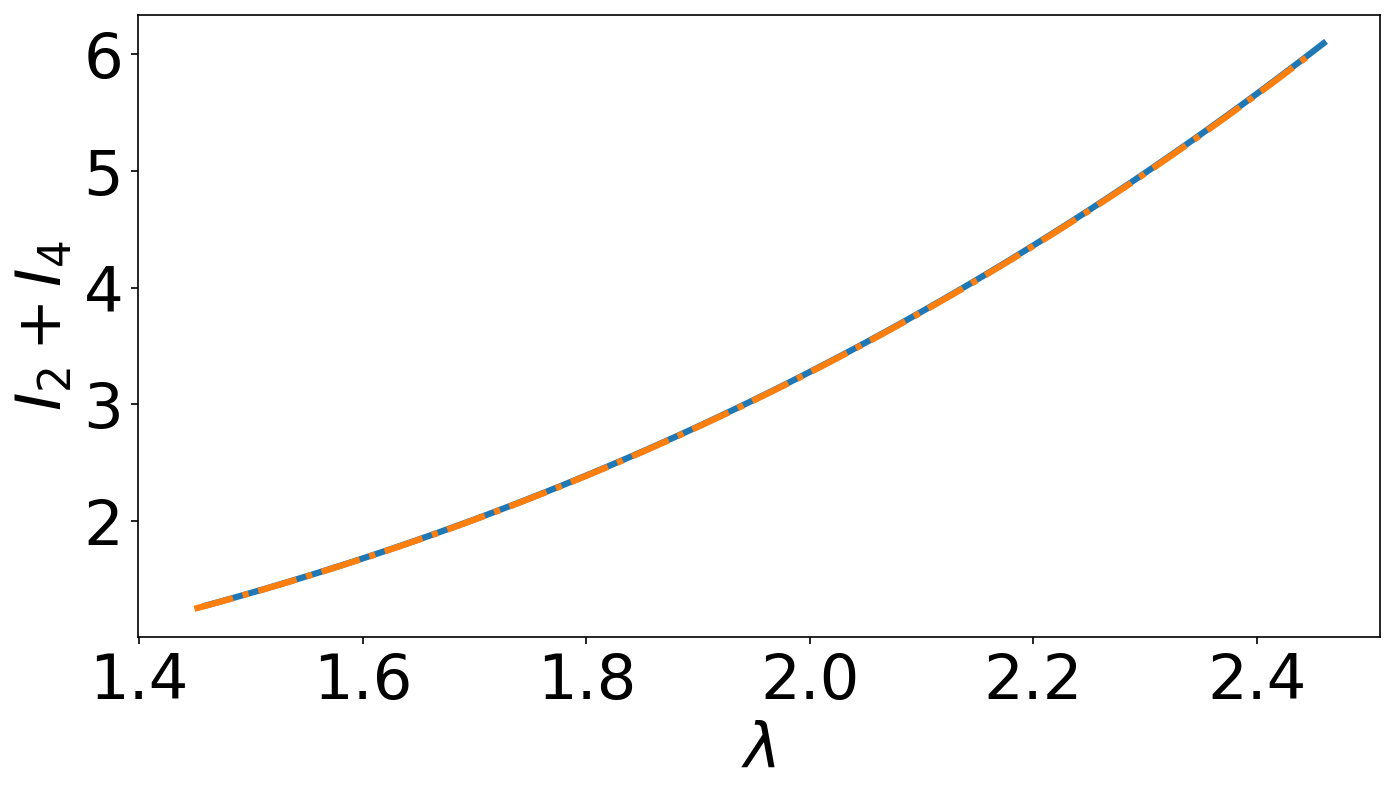

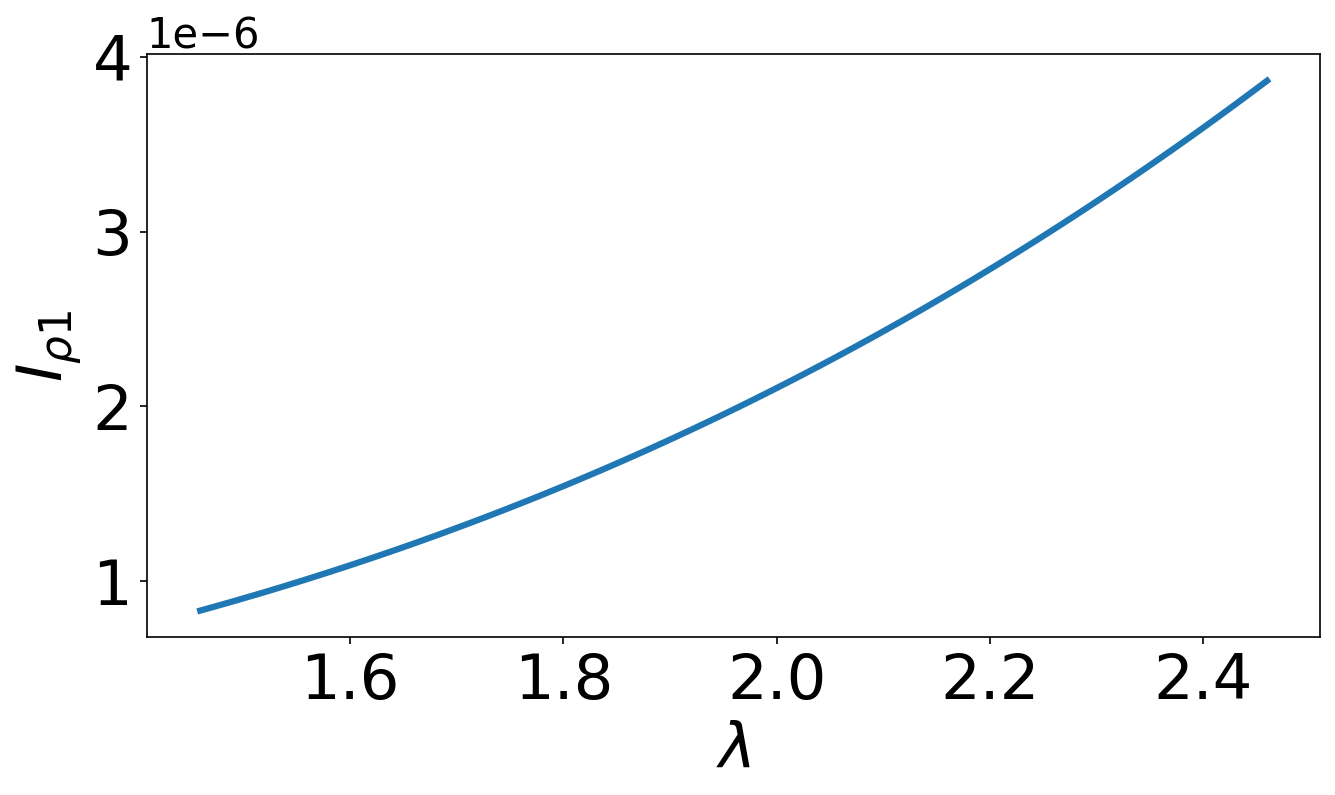

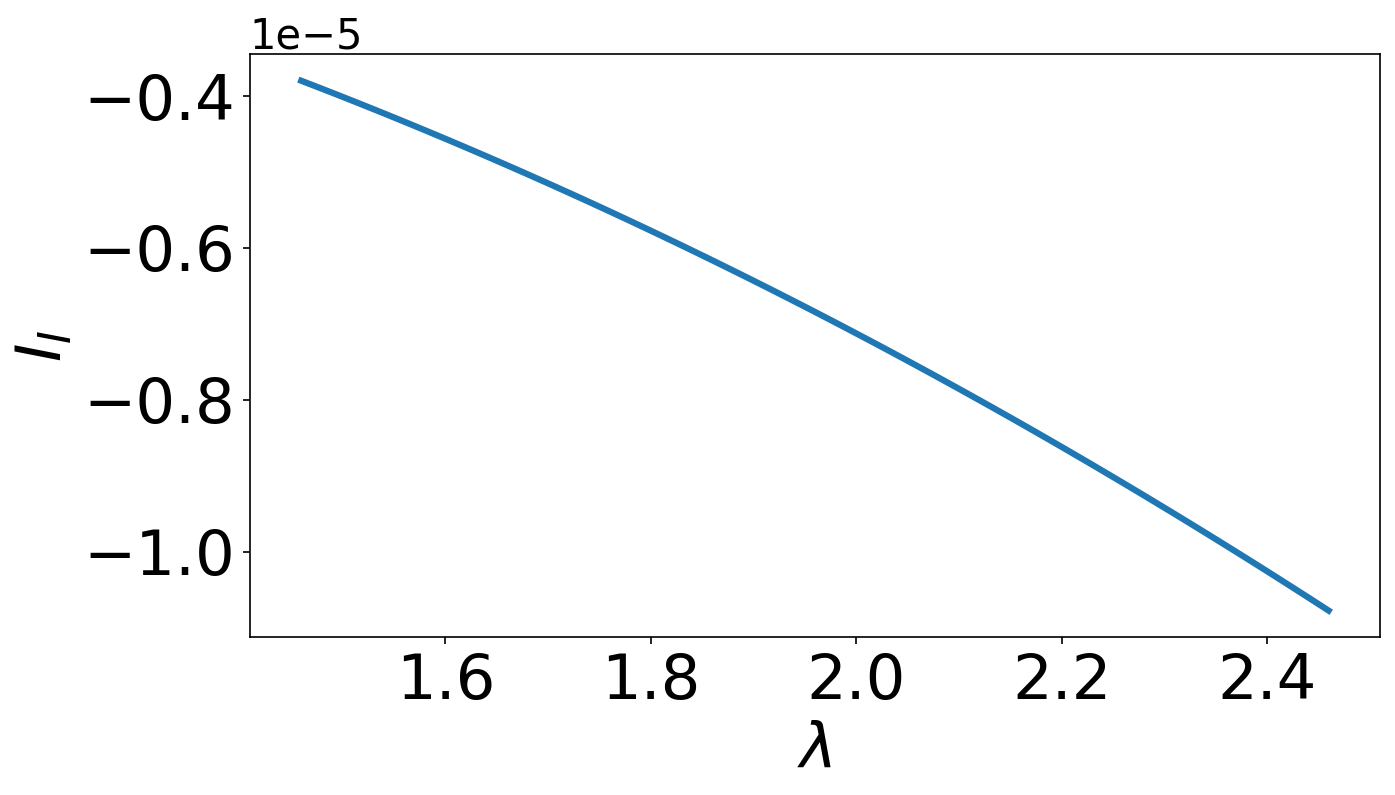

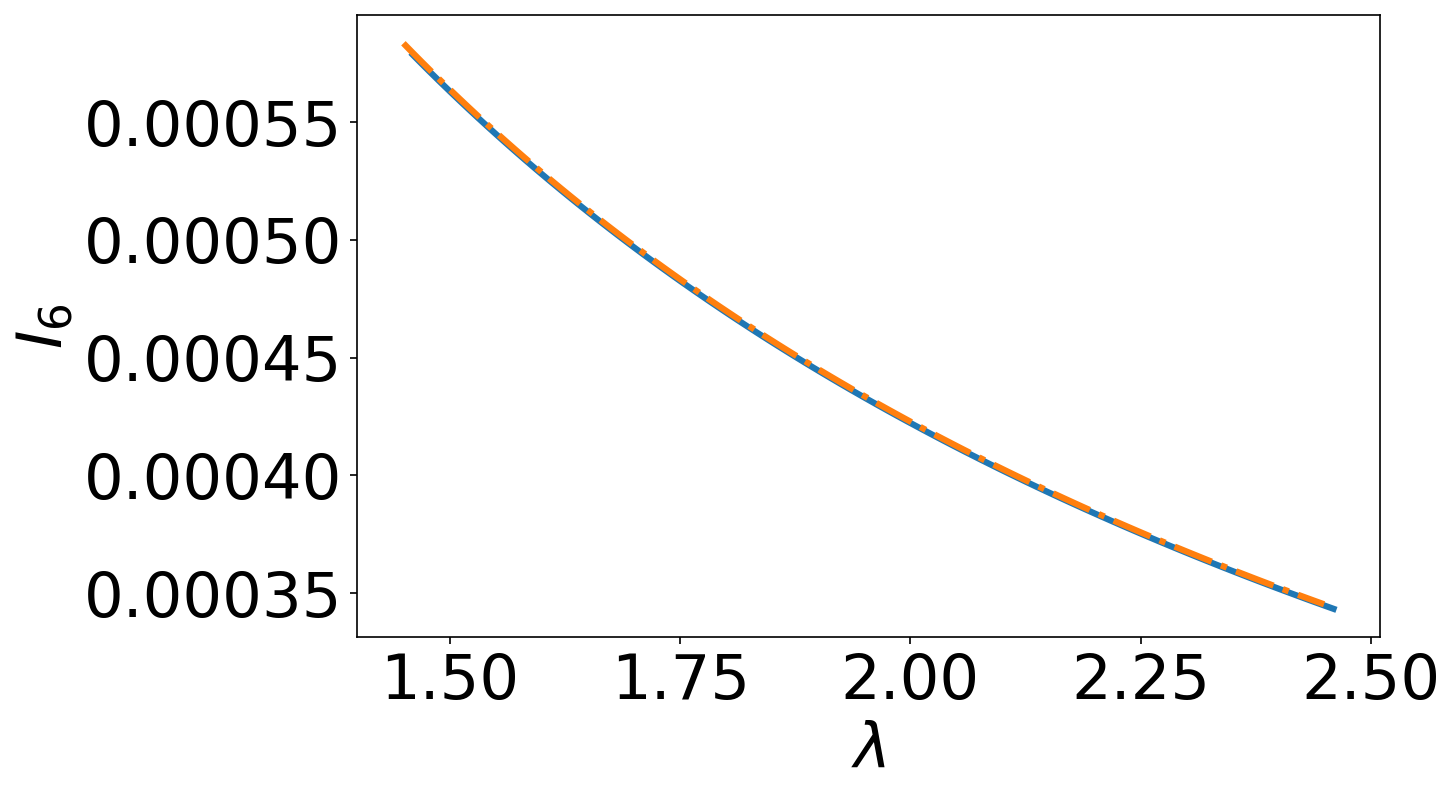

In [638]:
plt.figure('I12', figsize=(10, 6), dpi = 150)
plt.plot(np.sqrt(lams1)/ Factor_l1, I__121, '-', linewidth=3, label=r'Modelo $\rho$')
plt.plot(np.sqrt(lams2)/ Factor_l2, I__122, '-.', linewidth=3, label=r'Modelo 6')

plt.xlabel(r'$\lambda$'); plt.ylabel(r'$I_2+I_4$')
plt.yticks(fontsize=30)
plt.tight_layout()

plt.figure('I4', figsize=(10, 6), dpi = 150)
plt.plot(np.sqrt(lams1)/ Factor_l1, I__4, '-', linewidth=3)

plt.xlabel(r'$\lambda$'); plt.ylabel(r'$I_{\rho 1}$')
plt.yticks(fontsize=30)
plt.tight_layout()

plt.figure('I6', figsize=(10, 6), dpi = 150)
plt.plot(np.sqrt(lams1)/ Factor_l1, I__6, '-', linewidth=3)

plt.xlabel(r'$\lambda$'); plt.ylabel(r'$I_I$')
plt.yticks(fontsize=30)
plt.tight_layout()

plt.figure('I7', figsize=(10, 6), dpi = 150)
plt.plot(np.sqrt(lams1)/ Factor_l1, I__71, '-', linewidth=3, label=r'Modelo $\rho$')
plt.plot(np.sqrt(lams2)/ Factor_l2, I__72, '-.', linewidth=3, label=r'Modelo 6')

plt.xlabel(r'$\lambda$'); plt.ylabel(r'$I_6$')
plt.yticks(fontsize=30)
plt.tight_layout(); plt.show()

In [639]:
@njit
def dens_I_sk(F_pi_val, e_val, lam, r):
    a = np.sqrt(r*r+lam)
    return 8 *np.pi/(3*e_val**2)* np.sin(np.pi*r/a)**2 *(np.sin(np.pi*r/a)**2/r**2 + np.pi**2 *lam**2 /a**6 + (F_pi_val*e_val/2)**2)*r*r
@njit
def dens_I_4(k1, k3, r): return 4/3 *M5_dif(k1, k3, r)
@njit
def dens_I_6(k3, alpha, lam, r):
    a = np.sqrt(r*r+lam)
    return 32*np.pi/3 *alpha *r*r*np.sin(np.pi*r/a)*k3*(np.sin(2*np.pi*r/a)/r + 2*np.pi*lam/a**3)
@njit
def dens_I_7(F_pi_val, kapp_inv, lam, r):
    a = np.sqrt(r*r+lam)
    return 16*np.pi**3*kapp_inv*lam**2 /3 *np.sin(np.pi*r/a)/a**6

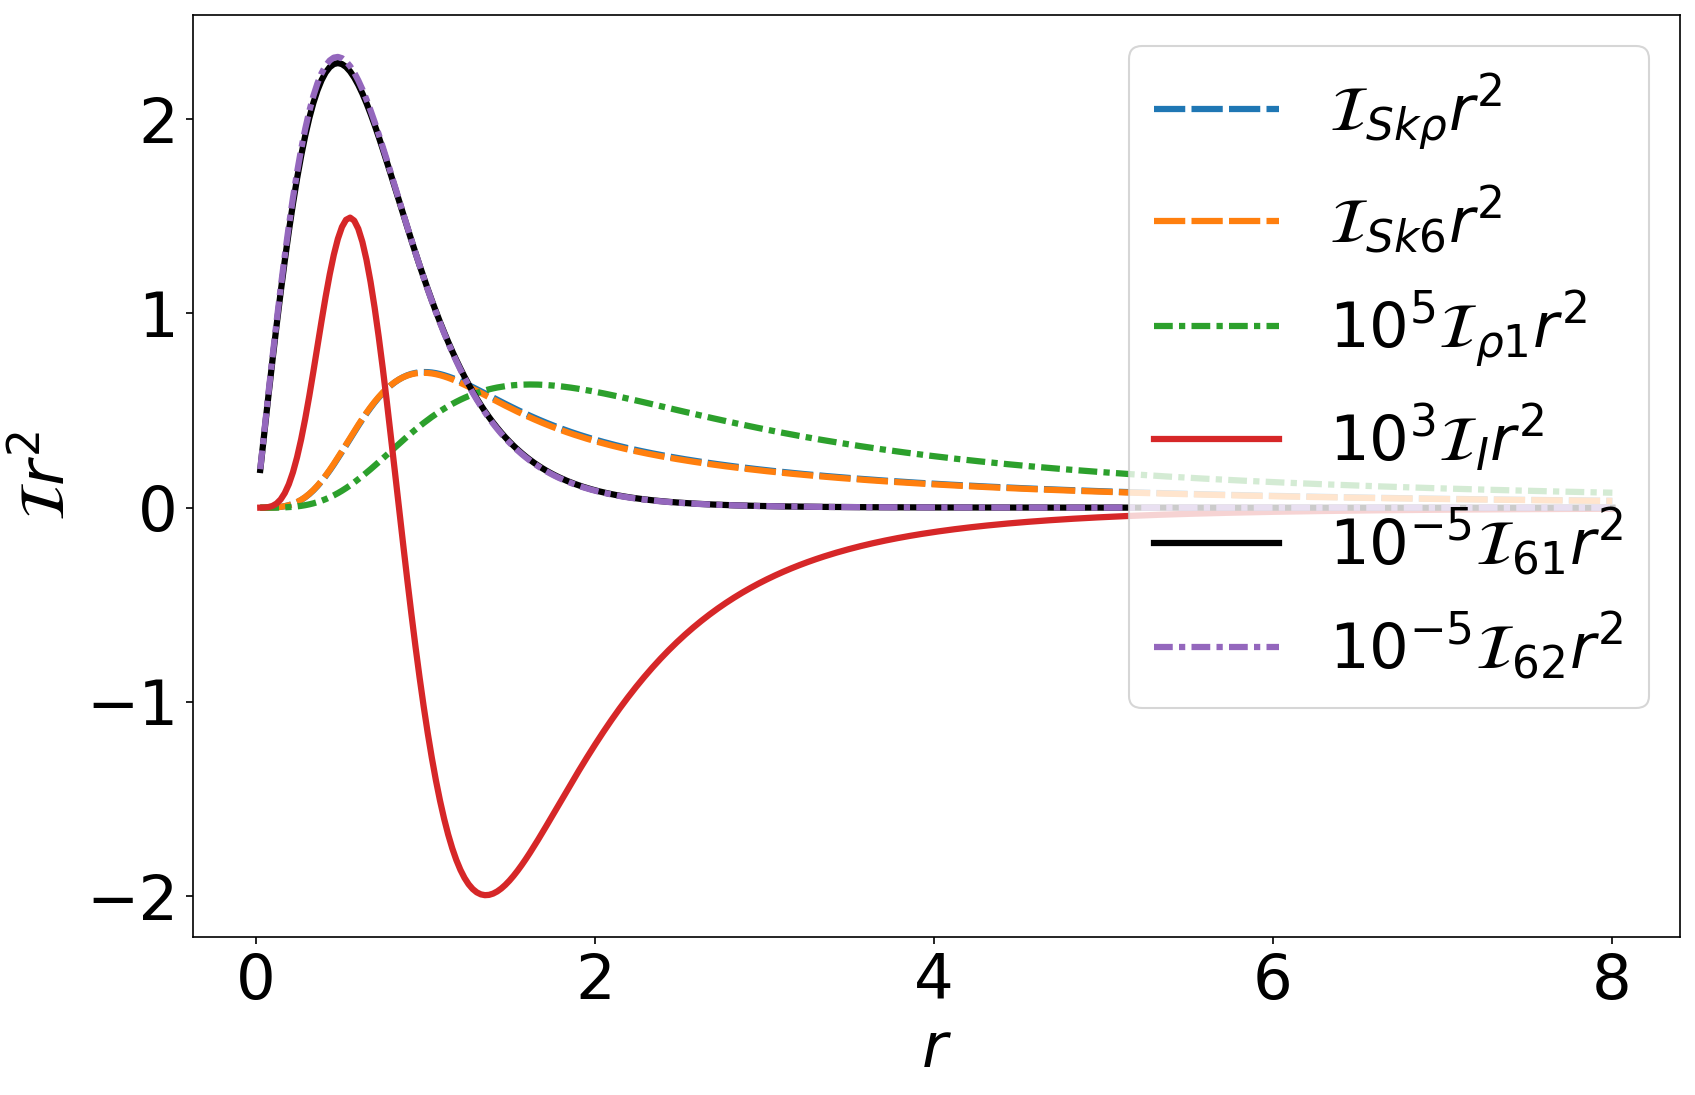

In [640]:
dens_I__121 = np.array( [ dens_I_sk(F_pi_val1, e_val1, lams31[0], _r) for _r in rs2 ] )
dens_I__122 = np.array( [ dens_I_sk(F_pi_val2, e_val2, lams32[0], _r) for _r in rs2 ] )
dens_I__4 = np.array( [ dens_I_4(k1_r_lam2[0][_r], k3_r_lam2[0][_r], rs2[_r]) for _r in range(len(rs2)) ] )
dens_I__6 = np.array( [ dens_I_6(k3_r_lam2[0][_r], alpha, lams31[0],  rs2[_r]) for _r in range(len(rs2)) ] )
dens_I__71 = np.array( [ dens_I_7(F_pi_val1, kapp_inv1, lams31[0], rs2[_r]) for _r in range(len(rs2)) ] )
dens_I__72 = np.array( [ dens_I_7(F_pi_val2, kapp_inv2, lams32[0], rs2[_r]) for _r in range(len(rs2)) ] )

plt.figure('Ii frente a r', figsize=(12, 8), dpi = 150)
plt.plot(rs2[1:int(len(rs2)/6)] / Factor_l1, dens_I__121[1:int(len(rs2)/6)], linestyle=(0, (5, 1)), label=r'$\mathcal{I}_{Sk \rho} r^2$', linewidth=3)
plt.plot(rs2[1:int(len(rs2)/6)] / Factor_l2, dens_I__122[1:int(len(rs2)/6)], linestyle=(0, (5, 1)), label=r'$\mathcal{I}_{Sk 6} r^2$', linewidth=3)
plt.plot(rs2[1:int(len(rs2)/6)] / Factor_l1, dens_I__4[1:int(len(rs2)/6)]*10**5, linestyle=(0, (3, 1, 1, 1)), label=r'$10^5 \mathcal{I}_{\rho 1} r^2$', linewidth=3)

plt.plot(rs2[1:int(len(rs2)/6)] / Factor_l1, dens_I__6[1:int(len(rs2)/6)]*10**3, '-',label=r'$10^3 \mathcal{I}_I r^2$', linewidth=3)
plt.plot(rs2[1:int(len(rs2)/6)] / Factor_l1, dens_I__71[1:int(len(rs2)/6)]/10**5, '-', color='black', label=r'$10^{-5} \mathcal{I}_{61} r^2$', linewidth=3)
plt.plot(rs2[1:int(len(rs2)/6)] / Factor_l2, dens_I__72[1:int(len(rs2)/6)]/10**5, linestyle=(0, (3, 1, 1, 1)), label=r'$10^{-5} \mathcal{I}_{62} r^2$', linewidth=3)

plt.xlabel(r'$r$'); plt.ylabel(r'$\mathcal{I} r^2$')
plt.yticks(fontsize=30)
plt.legend(loc='upper right', fontsize = 30)
plt.tight_layout(); plt.show()

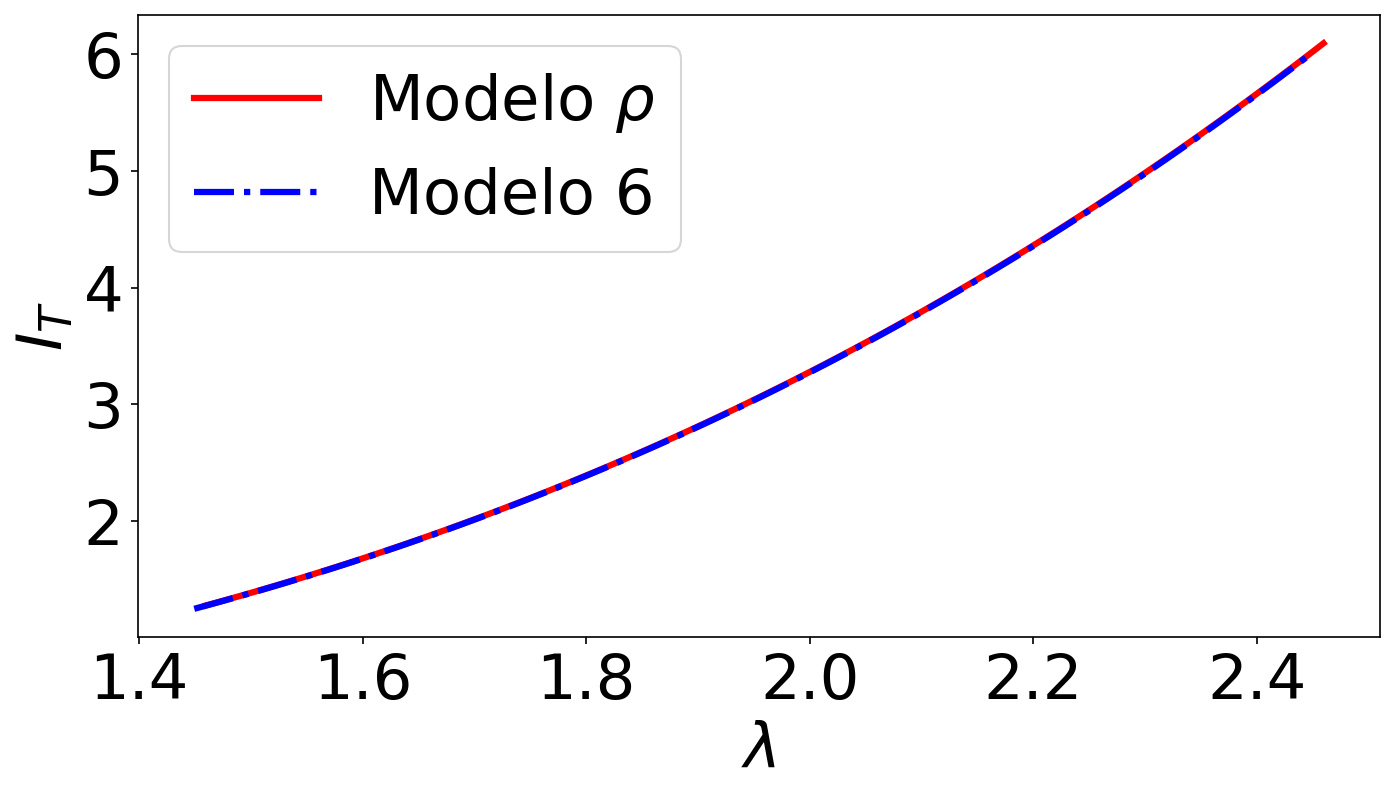

In [641]:
plt.figure('IT1', figsize=(10, 6), dpi = 150)
plt.plot(np.sqrt(lams1)/ Factor_l1, I__T1, '-r', linewidth=3,  label=r'Modelo $\rho$')
plt.plot(np.sqrt(lams2)/ Factor_l2, I__T2, '-.b', linewidth=3, label=r'Modelo 6')

plt.xlabel(r'$\lambda$'); plt.ylabel(r'$I_T$')
plt.legend(loc='upper left')
plt.yticks(fontsize=30)
plt.tight_layout()

In [642]:
@njit
def rbar(lam): return 0.55718 * lam
@njit
def r_cuad_med_bar(lam, convers): return np.sqrt(rbar(lam))/convers *10**15 #Convertimos a fm

@njit
def rmagn(lam): return 1.809321 * lam 
@njit
def r_cuad_med_magn(lam, convers): return np.sqrt(rmagn(lam))/convers *10**15 #Convertimos a fm

In [643]:
MSkyrm6 *=  Factor_e2
Mtotal *= Factor_e1

Masa neutronrho:  939.04  MeV
Masa deltarho:  1232.03  MeV
Masa neutron6:  939.0  MeV
Masa delta6:  1231.99  MeV

Radio barrho:  0.7178  fm
Radio magnrho:  1.2935  fm
Radio bar6:  0.7178  fm
Radio magn6:  1.2935  fm

mmag_prho:  2.006981
mmag_nrho:  -1.197957
mmag_p6:  2.006964
mmag_n6:  -1.197918


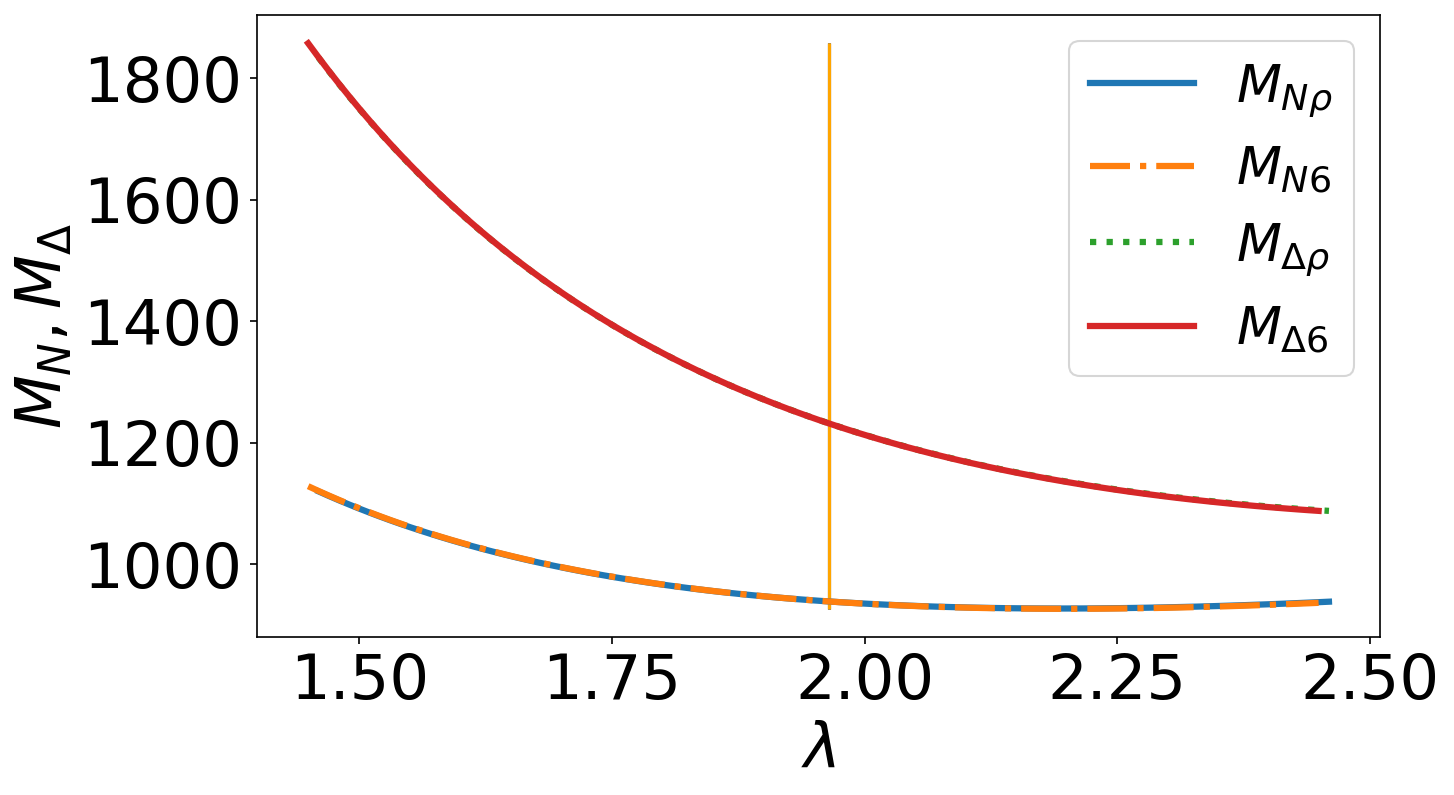

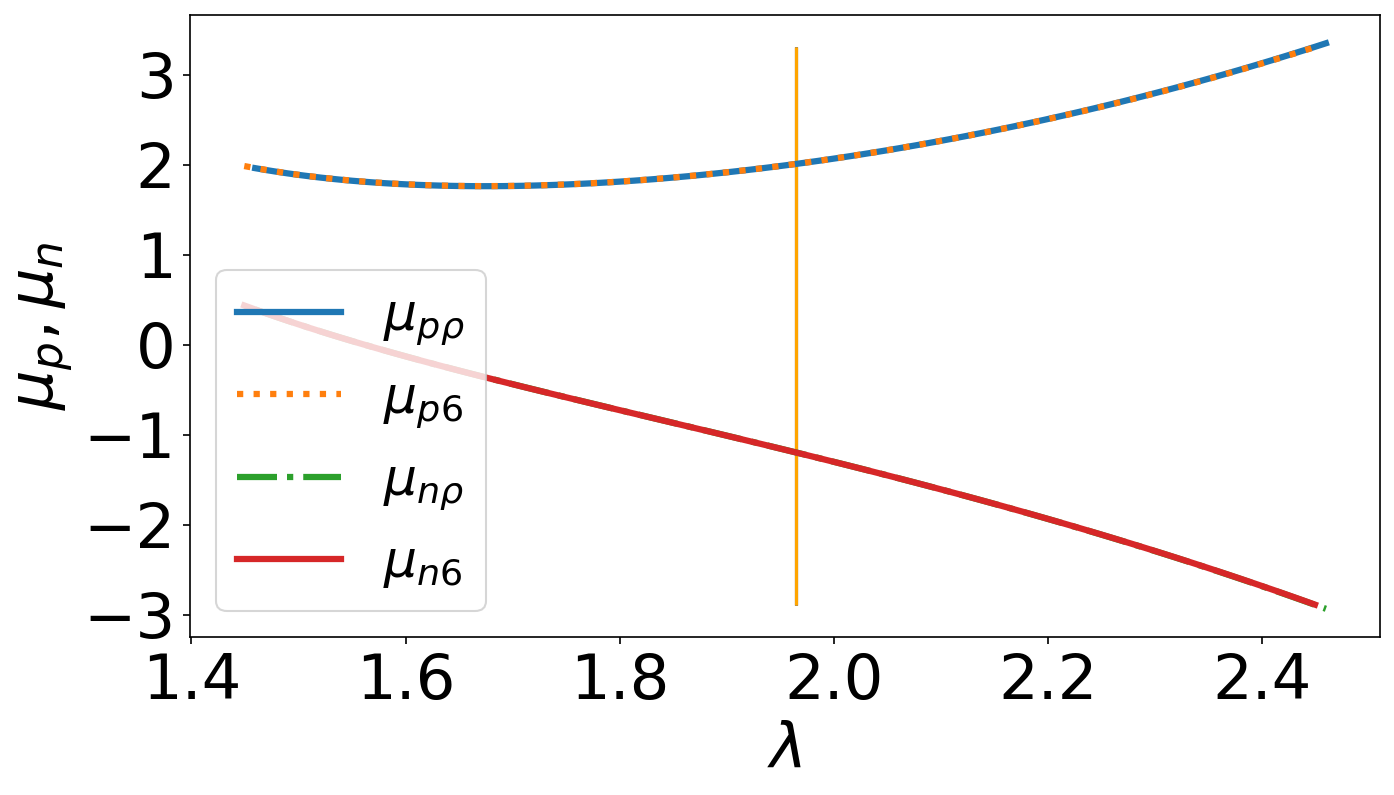

In [644]:
index1 = list(Mtotal).index(min(Mtotal))
index2 = list(MSkyrm6).index(min(MSkyrm6))

lam_min1 = lams1[index1]
lam_min2 = lams2[index2]

M_N1 = (Mtotal + 3./(8.*I__T1)*Factor_e1)
M_D1 = (Mtotal + 15./(8.*I__T1)*Factor_e1)

M_N2 = (MSkyrm6 + 3./(8.*I__T2)*Factor_e2)
M_D2 = (MSkyrm6 + 15./(8.*I__T2)*Factor_e2)

r_bar1 = r_cuad_med_bar(lam_min1, convers)
r_magn1 = r_cuad_med_magn(lam_min1, convers)

r_bar2 = r_cuad_med_bar(lam_min2, convers)
r_magn2 = r_cuad_med_magn(lam_min2, convers)

m_magn_p1 = M_N1/3*((r_bar1*convers *10**-15)**2/(2*I__T1)*Factor_e1 + I__T1/Factor_e1)
m_magn_n1 = M_N1/3*((r_bar1*convers *10**-15)**2/(2*I__T1)*Factor_e1 - I__T1/Factor_e1)

m_magn_p2 = M_N2/3*((r_bar2*convers *10**-15)**2/(2*I__T2)*Factor_e2 + I__T2/Factor_e2)
m_magn_n2 = M_N2/3*((r_bar2*convers *10**-15)**2/(2*I__T2)*Factor_e2 - I__T2/Factor_e2)

plt.figure('M_ND', figsize=(10, 6), dpi = 150)
plt.vlines(np.sqrt(lams1[index1])/ Factor_l1, min(M_N1), max(M_D2), color='black')
plt.vlines(np.sqrt(lams2[index2])/ Factor_l2, min(M_N1), max(M_D2), color='orange')
plt.plot(np.sqrt(lams1)/ Factor_l1, M_N1, '-', linewidth=3, label=r'$M_{N \rho}$')
plt.plot(np.sqrt(lams2)/ Factor_l2, M_N2, '-.', linewidth=3, label=r'$M_{N6}$')
plt.plot(np.sqrt(lams1)/ Factor_l1, M_D1, ':', linewidth=3, label=r'$M_{\Delta \rho}$')
plt.plot(np.sqrt(lams2)/ Factor_l2, M_D2, '-', linewidth=3, label=r'$M_{\Delta 6}$')

plt.xlabel(r'$\lambda$'); plt.ylabel(r'$M_N, M_\Delta$')
plt.yticks(fontsize=30)
plt.legend(loc='upper right', fontsize=25)
plt.tight_layout()

plt.figure('mu_np', figsize=(10, 6), dpi = 150)
plt.vlines(np.sqrt(lams1[index1])/ Factor_l1, min(m_magn_n2), max(m_magn_p2), color='black')
plt.vlines(np.sqrt(lams2[index2])/ Factor_l2, min(m_magn_n2), max(m_magn_p2), color='orange')
plt.plot(np.sqrt(lams1)/ Factor_l1, m_magn_p1, '-', linewidth=3, label=r'$\mu_{p\rho}$')
plt.plot(np.sqrt(lams2)/ Factor_l2, m_magn_p2, ':', linewidth=3, label=r'$\mu_{p6}$')
plt.plot(np.sqrt(lams1)/ Factor_l1, m_magn_n1, '-.', linewidth=3, label=r'$\mu_{n\rho}$')
plt.plot(np.sqrt(lams2)/ Factor_l2, m_magn_n2, '-', linewidth=3, label=r'$\mu_{n6}$')

plt.xlabel(r'$\lambda$'); plt.ylabel(r'$\mu_p, \mu_n$')
plt.yticks(fontsize=30)
plt.legend(loc='lower left', fontsize=25)
plt.tight_layout()


print('Masa neutronrho: ', round(M_N1[index1], 2), ' MeV')
print('Masa deltarho: ', round(M_D1[index1], 2), ' MeV')
print('Masa neutron6: ', round(M_N2[index2], 2), ' MeV')
print('Masa delta6: ', round(M_D2[index2], 2), ' MeV')
print()

print('Radio barrho: ', round(r_bar1, 4), ' fm')
print('Radio magnrho: ', round(r_magn1, 4), ' fm')
print('Radio bar6: ', round(r_bar2, 4), ' fm')
print('Radio magn6: ', round(r_magn2, 4), ' fm')
print()

print('mmag_prho: ', round(m_magn_p1[index1], 6))
print('mmag_nrho: ', round(m_magn_n1[index1], 6))
print('mmag_p6: ', round(m_magn_p2[index2], 6))
print('mmag_n6: ', round(m_magn_n2[index2], 6))

In [620]:
'''Masa neutronrho:  939.05  MeV
Masa deltarho:  1232.06  MeV
Masa neutron6:  939.0  MeV
Masa delta6:  1231.99  MeV'''

'Masa neutronrho:  939.05  MeV\nMasa deltarho:  1232.06  MeV\nMasa neutron6:  939.0  MeV\nMasa delta6:  1231.99  MeV'